<a href="https://colab.research.google.com/github/oktaviorezap/oktaviorezap/blob/main/Home_Credit_Scorecard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
# from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
# from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
# from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# **IMPORT DATASETS**

**Application Training Dataset**

In [4]:
#import dataset
df_training = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/application_train.csv', delimiter=',')

#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_training.shape)

#display top 5 rows of the dataset
df_training.head()

This dataset has 307511 rows dan 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#rename column to lowercase
df_training.columns= df_training.columns.str.lower()
df_training.columns

Index(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=122)

In [6]:
df_training.info(max_cols=200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    sk_id_curr                    307511 non-null  int64  
 1    target                        307511 non-null  int64  
 2    name_contract_type            307511 non-null  object 
 3    code_gender                   307511 non-null  object 
 4    flag_own_car                  307511 non-null  object 
 5    flag_own_realty               307511 non-null  object 
 6    cnt_children                  307511 non-null  int64  
 7    amt_income_total              307511 non-null  float64
 8    amt_credit                    307511 non-null  float64
 9    amt_annuity                   307499 non-null  float64
 10   amt_goods_price               307233 non-null  float64
 11   name_type_suite               306219 non-null  object 
 12   name_income_type            

**Application Test Dataset**

In [7]:
#import dataset
df_test = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/application_test.csv')

#display dataset form
#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)

#display top 5 rows of the dataset
df_test.head()

This dataset has 48744 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [8]:
#rename column to lowercase
df_test.columns= df_test.columns.str.lower()
df_test.columns

Index(['sk_id_curr', 'name_contract_type', 'code_gender', 'flag_own_car',
       'flag_own_realty', 'cnt_children', 'amt_income_total', 'amt_credit',
       'amt_annuity', 'amt_goods_price',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=121)

In [9]:
df_test.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    sk_id_curr                    48744 non-null  int64  
 1    name_contract_type            48744 non-null  object 
 2    code_gender                   48744 non-null  object 
 3    flag_own_car                  48744 non-null  object 
 4    flag_own_realty               48744 non-null  object 
 5    cnt_children                  48744 non-null  int64  
 6    amt_income_total              48744 non-null  float64
 7    amt_credit                    48744 non-null  float64
 8    amt_annuity                   48720 non-null  float64
 9    amt_goods_price               48744 non-null  float64
 10   name_type_suite               47833 non-null  object 
 11   name_income_type              48744 non-null  object 
 12   name_education_type           48744 non-null

**Bureau Dataset**

In [10]:
#import dataset
df_bureau = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/bureau.csv')

#display dataset form
#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_bureau.shape)

#display top 5 rows of the dataset
df_bureau.head()

This dataset has 1716428 rows dan 17 columns.



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
#rename column to lowercase
df_bureau.columns= df_bureau.columns.str.lower()
df_bureau.columns

Index(['sk_id_curr', 'sk_id_bureau', 'credit_active', 'credit_currency',
       'days_credit', 'credit_day_overdue', 'days_credit_enddate',
       'days_enddate_fact', 'amt_credit_max_overdue', 'cnt_credit_prolong',
       'amt_credit_sum', 'amt_credit_sum_debt', 'amt_credit_sum_limit',
       'amt_credit_sum_overdue', 'credit_type', 'days_credit_update',
       'amt_annuity'],
      dtype='object')

In [12]:
df_bureau.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sk_id_curr              1716428 non-null  int64  
 1   sk_id_bureau            1716428 non-null  int64  
 2   credit_active           1716428 non-null  object 
 3   credit_currency         1716428 non-null  object 
 4   days_credit             1716428 non-null  int64  
 5   credit_day_overdue      1716428 non-null  int64  
 6   days_credit_enddate     1610875 non-null  float64
 7   days_enddate_fact       1082775 non-null  float64
 8   amt_credit_max_overdue  591940 non-null   float64
 9   cnt_credit_prolong      1716428 non-null  int64  
 10  amt_credit_sum          1716415 non-null  float64
 11  amt_credit_sum_debt     1458759 non-null  float64
 12  amt_credit_sum_limit    1124648 non-null  float64
 13  amt_credit_sum_overdue  1716428 non-null  float64
 14  cr

**Bureau Balance Dataset**

In [13]:
#import dataset
df_bureau_balance = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/bureau_balance.csv')

#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_bureau_balance.shape)

#display top 5 rows of the dataset
df_bureau_balance.head()

This dataset has 27299925 rows dan 3 columns.



,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [14]:
#rename column to lowercase
df_bureau_balance.columns= df_bureau_balance.columns.str.lower()
df_bureau_balance.columns

Index(['sk_id_bureau', 'months_balance', 'status'], dtype='object')

In [15]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   sk_id_bureau    int64 
 1   months_balance  int64 
 2   status          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


**Credit Card Balance Dataset**

In [16]:
#import dataset
df_cc_balance = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/credit_card_balance.csv')

#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_cc_balance.shape)

#display top 5 rows of the dataset
df_cc_balance.head()

This dataset has 3840312 rows dan 23 columns.



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [17]:
#rename column to lowercase
df_cc_balance.columns= df_cc_balance.columns.str.lower()
df_cc_balance.columns

Index(['sk_id_prev', 'sk_id_curr', 'months_balance', 'amt_balance',
       'amt_credit_limit_actual', 'amt_drawings_atm_current',
       'amt_drawings_current', 'amt_drawings_other_current',
       'amt_drawings_pos_current', 'amt_inst_min_regularity',
       'amt_payment_current', 'amt_payment_total_current',
       'amt_receivable_principal', 'amt_recivable', 'amt_total_receivable',
       'cnt_drawings_atm_current', 'cnt_drawings_current',
       'cnt_drawings_other_current', 'cnt_drawings_pos_current',
       'cnt_instalment_mature_cum', 'name_contract_status', 'sk_dpd',
       'sk_dpd_def'],
      dtype='object')

In [18]:
df_cc_balance.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   sk_id_prev                  3840312 non-null  int64  
 1   sk_id_curr                  3840312 non-null  int64  
 2   months_balance              3840312 non-null  int64  
 3   amt_balance                 3840312 non-null  float64
 4   amt_credit_limit_actual     3840312 non-null  int64  
 5   amt_drawings_atm_current    3090496 non-null  float64
 6   amt_drawings_current        3840312 non-null  float64
 7   amt_drawings_other_current  3090496 non-null  float64
 8   amt_drawings_pos_current    3090496 non-null  float64
 9   amt_inst_min_regularity     3535076 non-null  float64
 10  amt_payment_current         3072324 non-null  float64
 11  amt_payment_total_current   3840312 non-null  float64
 12  amt_receivable_principal    3840312 non-null  float64
 1

**Installments Payment Dataset**

In [19]:
#import dataset
df_installments_pymnt = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/credit_card_balance.csv')

#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_installments_pymnt.shape)

#display top 5 rows of the dataset
df_installments_pymnt.head()

This dataset has 3840312 rows dan 23 columns.



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [20]:
#rename column to lowercase
df_installments_pymnt.columns= df_installments_pymnt.columns.str.lower()
df_installments_pymnt.columns

Index(['sk_id_prev', 'sk_id_curr', 'months_balance', 'amt_balance',
       'amt_credit_limit_actual', 'amt_drawings_atm_current',
       'amt_drawings_current', 'amt_drawings_other_current',
       'amt_drawings_pos_current', 'amt_inst_min_regularity',
       'amt_payment_current', 'amt_payment_total_current',
       'amt_receivable_principal', 'amt_recivable', 'amt_total_receivable',
       'cnt_drawings_atm_current', 'cnt_drawings_current',
       'cnt_drawings_other_current', 'cnt_drawings_pos_current',
       'cnt_instalment_mature_cum', 'name_contract_status', 'sk_dpd',
       'sk_dpd_def'],
      dtype='object')

In [21]:
df_installments_pymnt.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   sk_id_prev                  3840312 non-null  int64  
 1   sk_id_curr                  3840312 non-null  int64  
 2   months_balance              3840312 non-null  int64  
 3   amt_balance                 3840312 non-null  float64
 4   amt_credit_limit_actual     3840312 non-null  int64  
 5   amt_drawings_atm_current    3090496 non-null  float64
 6   amt_drawings_current        3840312 non-null  float64
 7   amt_drawings_other_current  3090496 non-null  float64
 8   amt_drawings_pos_current    3090496 non-null  float64
 9   amt_inst_min_regularity     3535076 non-null  float64
 10  amt_payment_current         3072324 non-null  float64
 11  amt_payment_total_current   3840312 non-null  float64
 12  amt_receivable_principal    3840312 non-null  float64
 1

**Previous Application Dataset**

In [22]:
#import dataset
df_prev_app = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/previous_application.csv')

#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_prev_app.shape)

#display top 5 rows of the dataset
df_prev_app.head()

This dataset has 1670214 rows dan 37 columns.



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#rename column to lowercase
df_prev_app.columns= df_prev_app.columns.str.lower()
df_prev_app.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')

In [24]:
df_prev_app.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_down_payment             774370 non-null   float64
 7   amt_goods_price              1284699 non-null  float64
 8   weekday_appr_process_start   1670214 non-null  object 
 9   hour_appr_process_start      1670214 non-null  int64  
 10  flag_last_appl_per_contract  1670214 non-null  object 
 11  nflag_last_appl_in_day       1670214 non-null  int64  
 12  rate_down_payment            774370 non-nu

**Sample Submission Dataset**

In [25]:
#import dataset
df_sample_submission = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/sample_submission.csv')

#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_sample_submission.shape)

#display top 5 rows of the dataset
df_sample_submission.head()

This dataset has 48744 rows dan 2 columns.



,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [26]:
#rename column to lowercase
df_sample_submission.columns= df_sample_submission.columns.str.lower()
df_sample_submission.columns

Index(['sk_id_curr', 'target'], dtype='object')

In [27]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sk_id_curr  48744 non-null  int64  
 1   target      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [28]:
train = df_training.copy()

In [29]:
train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [30]:
train.info(max_cols=200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    sk_id_curr                    307511 non-null  int64  
 1    target                        307511 non-null  int64  
 2    name_contract_type            307511 non-null  object 
 3    code_gender                   307511 non-null  object 
 4    flag_own_car                  307511 non-null  object 
 5    flag_own_realty               307511 non-null  object 
 6    cnt_children                  307511 non-null  int64  
 7    amt_income_total              307511 non-null  float64
 8    amt_credit                    307511 non-null  float64
 9    amt_annuity                   307499 non-null  float64
 10   amt_goods_price               307233 non-null  float64
 11   name_type_suite               306219 non-null  object 
 12   name_income_type            

In [31]:
#Convert Gender values from M to "Male" and F to "Female"
train['code_gender'] = train['code_gender'].replace(['M','F'],['Male','Female'])

#Convert flag_own_car, flag_own_realty values from Y to "Yes" and N to "No"
train['flag_own_car'] = train['flag_own_car'].replace(['Y','N'],['Yes','No'])
train['flag_own_realty'] = train['flag_own_realty'].replace(['Y','N'],['Yes','No'])

#Convert value in weekday_appr_process_start with capitalize
train['weekday_appr_process_start'] = train['weekday_appr_process_start'].str.capitalize()

In [32]:
#Convert Target Value from 0 to "No Difficult Payment" and 1 to "Difficult Payment"
def dummy_var(target):
  if target == 0:
    return 'No Difficult Payment'
  elif target == 1:
    return 'Difficult Payment'

train['target'] = train['target'].apply(dummy_var)

In [33]:
train['target'].unique()

array(['Difficult Payment', 'No Difficult Payment'], dtype=object)

The Distribution of Clients Repayment Abilities

In [34]:
target_group = train.groupby('target').agg(target_cnt=('target','count')).sort_values(by='target', ascending=True).reset_index()
target_group.style.background_gradient()

,target,target_cnt
0,Difficult Payment,24825
1,No Difficult Payment,282686


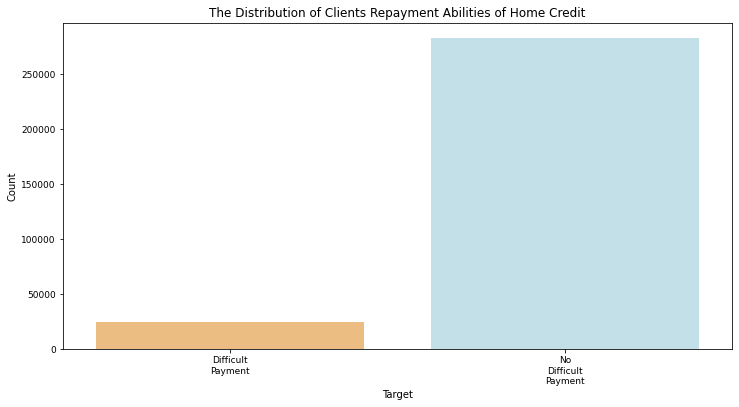

In [35]:
plt.figure(figsize = (12,6))

import textwrap
f = lambda x: textwrap.fill(x.get_text(), 10)

a = sns.countplot('target', data = train, palette = 'RdYlBu')

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('The Distribution of Clients Repayment Abilities of Home Credit')
a.set_xticklabels(map(f, a.get_xticklabels()))
plt.tick_params(labelsize=9)

plt.show()

In [36]:
target_norm = train['target'].value_counts(normalize=True).mul(100).round(2).reset_index()
target_norm.columns = ['target','distribution']
target_norm.style.background_gradient(cmap='gnuplot2_r')

,target,distribution
0,No Difficult Payment,91.930000
1,Difficult Payment,8.070000


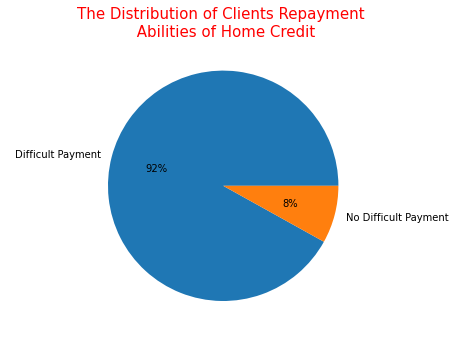

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Difficult Payment','No Difficult Payment']
churn = train.target.value_counts()
ax.pie(churn, labels=labels, autopct= '%.0f%%')
plt.title(label = 'The Distribution of Clients Repayment \n Abilities of Home Credit',
          size = 15,
          color = 'red')
plt.show()

# **Data Visualization Clients Repayment Abilities (1)**

Client Repayment Abilities by :
* Gender
* Own Car (Yes or No)
* Own Realty (Yes Or No)
* Contract Type
* Income Type
* Education Type
* Family Type
* Housing Type

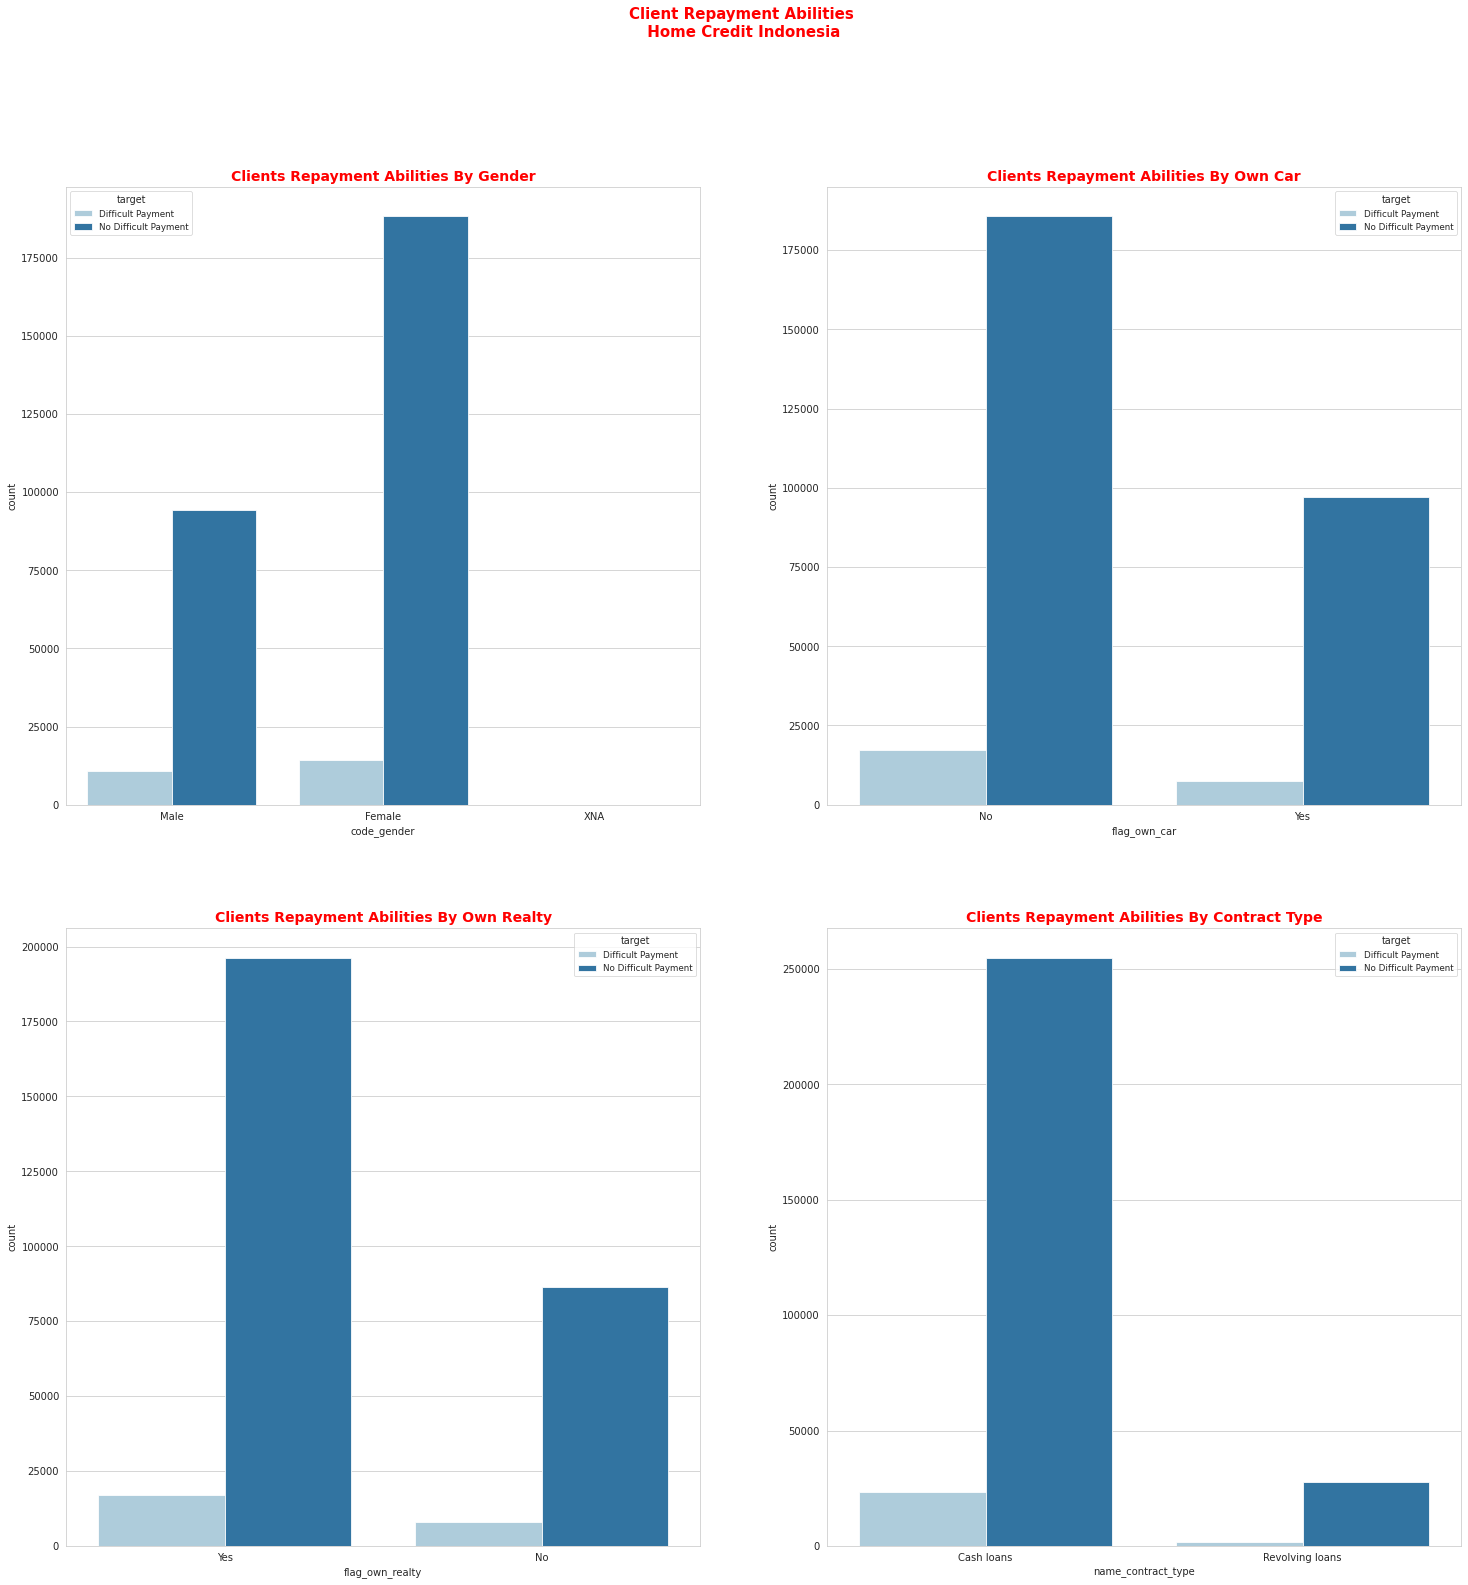

In [38]:
#Data Visualization Clients Repayment Abilities (1)
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2 , figsize=(25,25))
sns.set_context('paper', font_scale=1)

#Give Title
fig.suptitle('Client Repayment Abilities\n Home Credit Indonesia',color = 'red', fontweight= 'bold',fontsize = 15)

ax[0][0].set_title('Clients Repayment Abilities By Gender', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='code_gender', data = train, hue = 'target', palette = 'Paired', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Own Car', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='flag_own_car', data = train, hue = 'target', palette = 'Paired', ax=ax[0][1])

ax[1][0].set_title('Clients Repayment Abilities By Own Realty', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='flag_own_realty', data = train, hue = 'target', palette = 'Paired', ax=ax[1][0])

ax[1][1].set_title('Clients Repayment Abilities By Contract Type', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='name_contract_type', data = train, hue = 'target', palette = 'Paired', ax=ax[1][1])

**Client Repayment Abilities by Gender**

In [39]:
#Client Repayment Abilities by Gender
gender_group = train.groupby(by=['code_gender','target']).agg(target_cnt=('target','count')).sort_values(by=['code_gender','target_cnt'], ascending=True).reset_index()
gender_group['percentage (%)'] = 100 * gender_group['target_cnt'] / gender_group.groupby('code_gender')['target_cnt'].transform('sum')
gender_group.style.background_gradient(cmap='GnBu')

,code_gender,target,target_cnt,percentage (%)
0,Female,Difficult Payment,14170,6.999328
1,Female,No Difficult Payment,188278,93.000672
2,Male,Difficult Payment,10655,10.141920
3,Male,No Difficult Payment,94404,89.858080
4,XNA,No Difficult Payment,4,100.000000


**Client Repayment Abilities by Own Car**

In [40]:
#Client Repayment Abilities by Own Car
car_group = train.groupby(by=['flag_own_car','target']).agg(target_cnt=('target','count')).sort_values(by=['flag_own_car','target_cnt'], ascending=True).reset_index()
car_group['percentage (%)'] = 100 * car_group['target_cnt'] / car_group.groupby('flag_own_car')['target_cnt'].transform('sum')
car_group.style.background_gradient(cmap='GnBu')

,flag_own_car,target,target_cnt,percentage (%)
0,No,Difficult Payment,17249,8.500227
1,No,No Difficult Payment,185675,91.499773
2,Yes,Difficult Payment,7576,7.243730
3,Yes,No Difficult Payment,97011,92.756270


**Client Repayment Abilities by Own Realty**

In [41]:
 #Client Repayment Abilities by Own Realty
realty_group = train.groupby(by=['flag_own_realty','target']).agg(target_cnt=('target','count')).sort_values(by=['flag_own_realty','target_cnt'], ascending=True).reset_index()
realty_group['percentage (%)'] = 100 * realty_group['target_cnt'] / realty_group.groupby('flag_own_realty')['target_cnt'].transform('sum')
realty_group.style.background_gradient(cmap='GnBu')

,flag_own_realty,target,target_cnt,percentage (%)
0,No,Difficult Payment,7842,8.324929
1,No,No Difficult Payment,86357,91.675071
2,Yes,Difficult Payment,16983,7.961577
3,Yes,No Difficult Payment,196329,92.038423


**Client Repayment Abilities by Contract Type**

In [42]:
#Client Repayment Abilities by Contract Type
contract_group = train.groupby(by=['name_contract_type','target']).agg(target_cnt=('target','count')).sort_values(by=['name_contract_type','target_cnt'], ascending=True).reset_index()
contract_group['percentage (%)'] = 100 * contract_group['target_cnt'] / contract_group.groupby('name_contract_type')['target_cnt'].transform('sum')
contract_group.style.background_gradient(cmap='GnBu')

,name_contract_type,target,target_cnt,percentage (%)
0,Cash loans,Difficult Payment,23221,8.345913
1,Cash loans,No Difficult Payment,255011,91.654087
2,Revolving loans,Difficult Payment,1604,5.478329
3,Revolving loans,No Difficult Payment,27675,94.521671


# **Data Visualization Clients Repayment Abilities (2)**

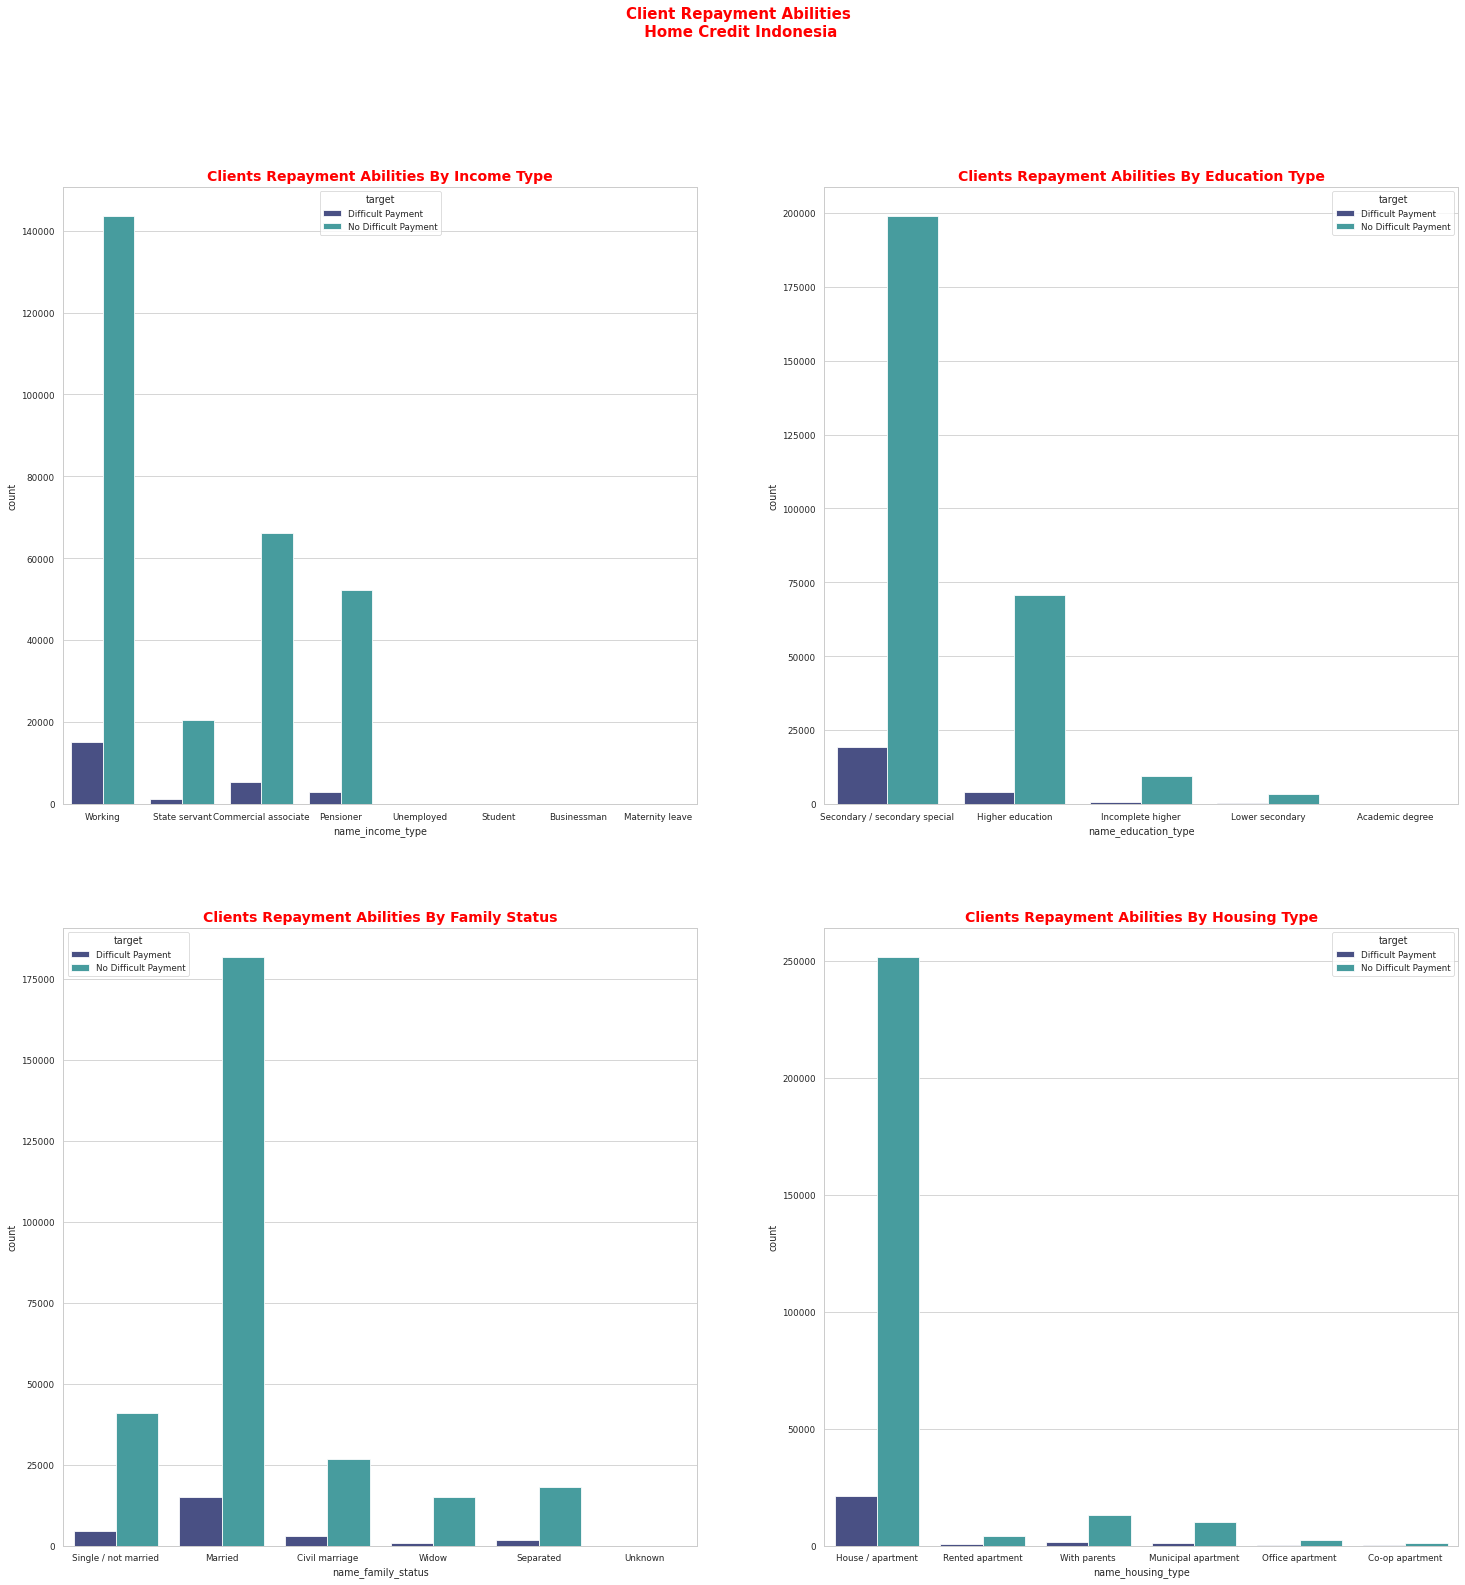

In [43]:
#Data Visualization Clients Repayment Abilities (2)
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2 , figsize=(25,25))
sns.set_context('paper', font_scale=1)

#Give Title
fig.suptitle('Client Repayment Abilities\n Home Credit Indonesia',color = 'red', fontweight= 'bold',fontsize = 15)

ax[0][0].set_title('Clients Repayment Abilities By Income Type', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='name_income_type',data = train, hue = 'target', palette = 'mako', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Education Type', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='name_education_type', data = train, hue = 'target', palette = 'mako', ax=ax[0][1])

ax[1][0].set_title('Clients Repayment Abilities By Family Status', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='name_family_status', data = train, hue = 'target', palette = 'mako', ax=ax[1][0])

ax[1][1].set_title('Clients Repayment Abilities By Housing Type', fontweight='bold', fontsize=14, color='red')
sns.countplot(x='name_housing_type', data = train, hue = 'target', palette = 'mako', ax=ax[1][1])

**Client Repayment Abilities by Income Type**

In [44]:
#Client Repayment Abilities by Income Type
income_group = train.groupby(by=['name_income_type','target']).agg(target_cnt=('target','count')).sort_values(by=['name_income_type','target_cnt'], ascending=True).reset_index()
income_group['percentage (%)'] = 100 * income_group['target_cnt'] / income_group.groupby('name_income_type')['target_cnt'].transform('sum')
income_group.style.background_gradient(cmap='BuGn')

,name_income_type,target,target_cnt,percentage (%)
0,Businessman,No Difficult Payment,10,100.000000
1,Commercial associate,Difficult Payment,5360,7.484257
2,Commercial associate,No Difficult Payment,66257,92.515743
3,Maternity leave,Difficult Payment,2,40.000000
4,Maternity leave,No Difficult Payment,3,60.000000
5,Pensioner,Difficult Payment,2982,5.386366
6,Pensioner,No Difficult Payment,52380,94.613634
7,State servant,Difficult Payment,1249,5.754965
8,State servant,No Difficult Payment,20454,94.245035
9,Student,No Difficult Payment,18,100.000000


**Client Repayment Abilities by Education Type**

In [45]:
#Client Repayment Abilities by Education Type
edu_group = train.groupby(by=['name_education_type','target']).agg(target_cnt=('target','count')).sort_values(by=['name_education_type','target_cnt'], ascending=True).reset_index()
edu_group['percentage (%)'] = 100 * edu_group['target_cnt'] / edu_group.groupby('name_education_type')['target_cnt'].transform('sum')
edu_group.style.background_gradient(cmap='BuGn')

,name_education_type,target,target_cnt,percentage (%)
0,Academic degree,Difficult Payment,3,1.829268
1,Academic degree,No Difficult Payment,161,98.170732
2,Higher education,Difficult Payment,4009,5.355115
3,Higher education,No Difficult Payment,70854,94.644885
4,Incomplete higher,Difficult Payment,872,8.484966
5,Incomplete higher,No Difficult Payment,9405,91.515034
6,Lower secondary,Difficult Payment,417,10.927673
7,Lower secondary,No Difficult Payment,3399,89.072327
8,Secondary / secondary special,Difficult Payment,19524,8.939929
9,Secondary / secondary special,No Difficult Payment,198867,91.060071


**Client Repayment Abilities by Family Status**

In [46]:
#Client Repayment Abilities by Family Status
family_group = train.groupby(by=['name_family_status','target']).agg(target_cnt=('target','count')).sort_values(by=['name_family_status','target_cnt'], ascending=True).reset_index()
family_group['percentage (%)'] = 100 * family_group['target_cnt'] / family_group.groupby('name_family_status')['target_cnt'].transform('sum')
family_group.style.background_gradient(cmap='BuGn')

,name_family_status,target,target_cnt,percentage (%)
0,Civil marriage,Difficult Payment,2961,9.944584
1,Civil marriage,No Difficult Payment,26814,90.055416
2,Married,Difficult Payment,14850,7.559868
3,Married,No Difficult Payment,181582,92.440132
4,Separated,Difficult Payment,1620,8.194234
5,Separated,No Difficult Payment,18150,91.805766
6,Single / not married,Difficult Payment,4457,9.807675
7,Single / not married,No Difficult Payment,40987,90.192325
8,Unknown,No Difficult Payment,2,100.000000
9,Widow,Difficult Payment,937,5.824217


**Client Repayment Abilities by Housing Type**

In [47]:
#Client Repayment Abilities by Housing Type
housing_group = train.groupby(by=['name_housing_type','target']).agg(target_cnt=('target','count')).sort_values(by=['name_housing_type','target_cnt'], ascending=True).reset_index()
housing_group ['percentage (%)'] = 100 * housing_group['target_cnt'] / housing_group.groupby('name_housing_type')['target_cnt'].transform('sum')
housing_group.style.background_gradient(cmap='BuGn') 

,name_housing_type,target,target_cnt,percentage (%)
0,Co-op apartment,Difficult Payment,89,7.932264
1,Co-op apartment,No Difficult Payment,1033,92.067736
2,House / apartment,Difficult Payment,21272,7.795711
3,House / apartment,No Difficult Payment,251596,92.204289
4,Municipal apartment,Difficult Payment,955,8.539748
5,Municipal apartment,No Difficult Payment,10228,91.460252
6,Office apartment,Difficult Payment,172,6.572411
7,Office apartment,No Difficult Payment,2445,93.427589
8,Rented apartment,Difficult Payment,601,12.313051
9,Rented apartment,No Difficult Payment,4280,87.686949


# **Data Visualization Clients Repayment Abilities (3)**

Text(0.5, 0, '\nCount')

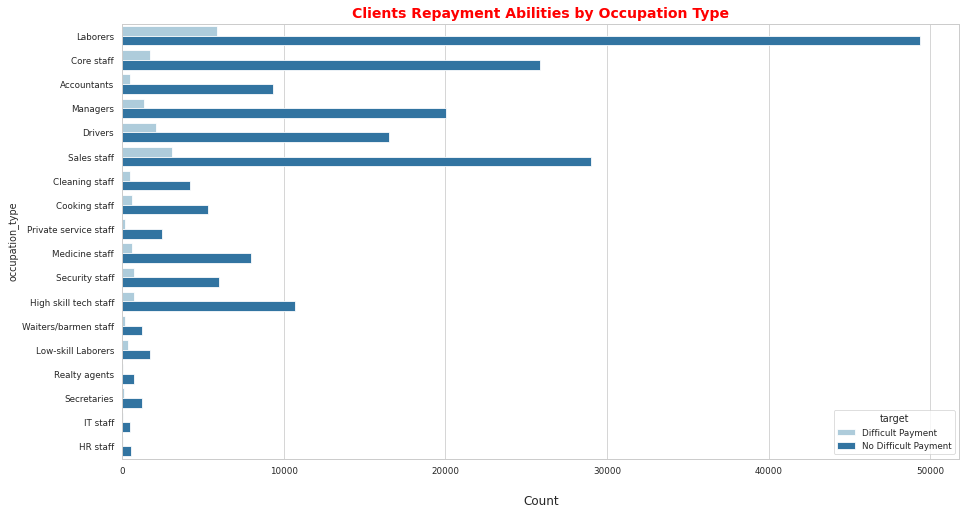

In [48]:
#Data Visualization Clients Repayment Abilities (3)
plt.figure(figsize=(15,8))
fig = sns.countplot(y='occupation_type', data = train, hue = 'target', palette = 'Paired')
plt.title('Clients Repayment Abilities by Occupation Type', fontweight='bold', fontsize=14, color='red')
plt.xlabel('\nCount', fontsize=12)

**Client Repayment Abilities by Occupation Type**

In [49]:
#Client Repayment Abilities by Occupation Type
occ_group = train.groupby(by=['occupation_type','target']).agg(target_cnt=('target','count')).sort_values(by=['occupation_type','target_cnt'], ascending=True).reset_index()
occ_group ['percentage (%)'] = 100 * occ_group['target_cnt'] / occ_group.groupby('occupation_type')['target_cnt'].transform('sum')
occ_group.style.background_gradient(cmap='BuGn') 

,occupation_type,target,target_cnt,percentage (%)
0,Accountants,Difficult Payment,474,4.830327
1,Accountants,No Difficult Payment,9339,95.169673
2,Cleaning staff,Difficult Payment,447,9.606705
3,Cleaning staff,No Difficult Payment,4206,90.393295
4,Cooking staff,Difficult Payment,621,10.443996
5,Cooking staff,No Difficult Payment,5325,89.556004
6,Core staff,Difficult Payment,1738,6.303954
7,Core staff,No Difficult Payment,25832,93.696046
8,Drivers,Difficult Payment,2107,11.326130
9,Drivers,No Difficult Payment,16496,88.673870


# **Data Visualization Clients Repayment Abilities (4)**

Text(0.5, 0, '\nProcess Day')

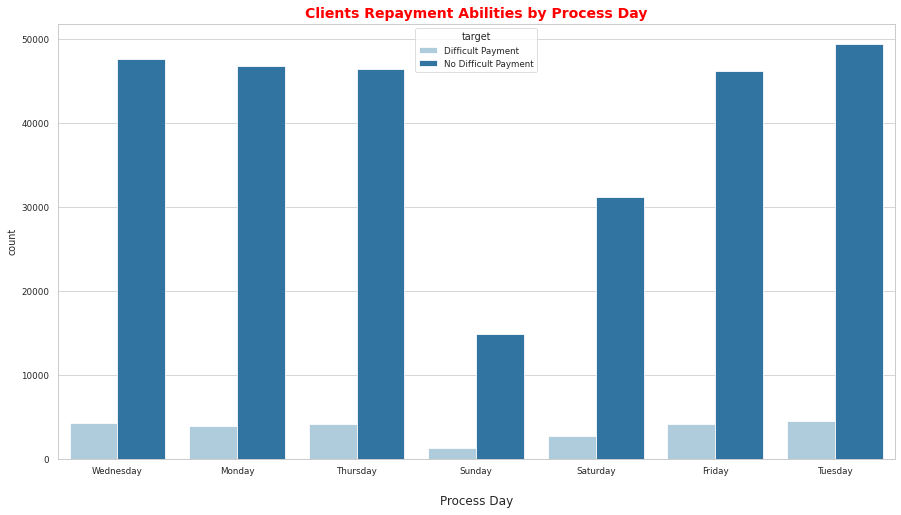

In [50]:
#Data Visualization Clients Repayment Abilities (4)
plt.figure(figsize=(15,8))
fig = sns.countplot(x='weekday_appr_process_start', data = train, hue = 'target', palette = 'Paired')
plt.title('Clients Repayment Abilities by Process Day', fontweight='bold', fontsize=14, color='red')
plt.xlabel('\nProcess Day', fontsize=12)

**Client Repayment Abilities by Process Day**

In [51]:
#Client Repayment Abilities by Process Day
process_group = train.groupby(by=['weekday_appr_process_start','target']).agg(target_cnt=('target','count')).sort_values(by=['weekday_appr_process_start','target_cnt'], ascending=True).reset_index()
process_group ['percentage (%)'] = 100 * process_group['target_cnt'] / process_group.groupby('weekday_appr_process_start')['target_cnt'].transform('sum')
process_group.style.background_gradient(cmap='BuGn')

,weekday_appr_process_start,target,target_cnt,percentage (%)
0,Friday,Difficult Payment,4101,8.146927
1,Friday,No Difficult Payment,46237,91.853073
2,Monday,Difficult Payment,3934,7.757227
3,Monday,No Difficult Payment,46780,92.242773
4,Saturday,Difficult Payment,2670,7.887274
5,Saturday,No Difficult Payment,31182,92.112726
6,Sunday,Difficult Payment,1283,7.929053
7,Sunday,No Difficult Payment,14898,92.070947
8,Thursday,Difficult Payment,4098,8.100255
9,Thursday,No Difficult Payment,46493,91.899745


# **Data Visualization Clients Repayment Abilities (5)**

Text(0.5, 0, '\nCount')

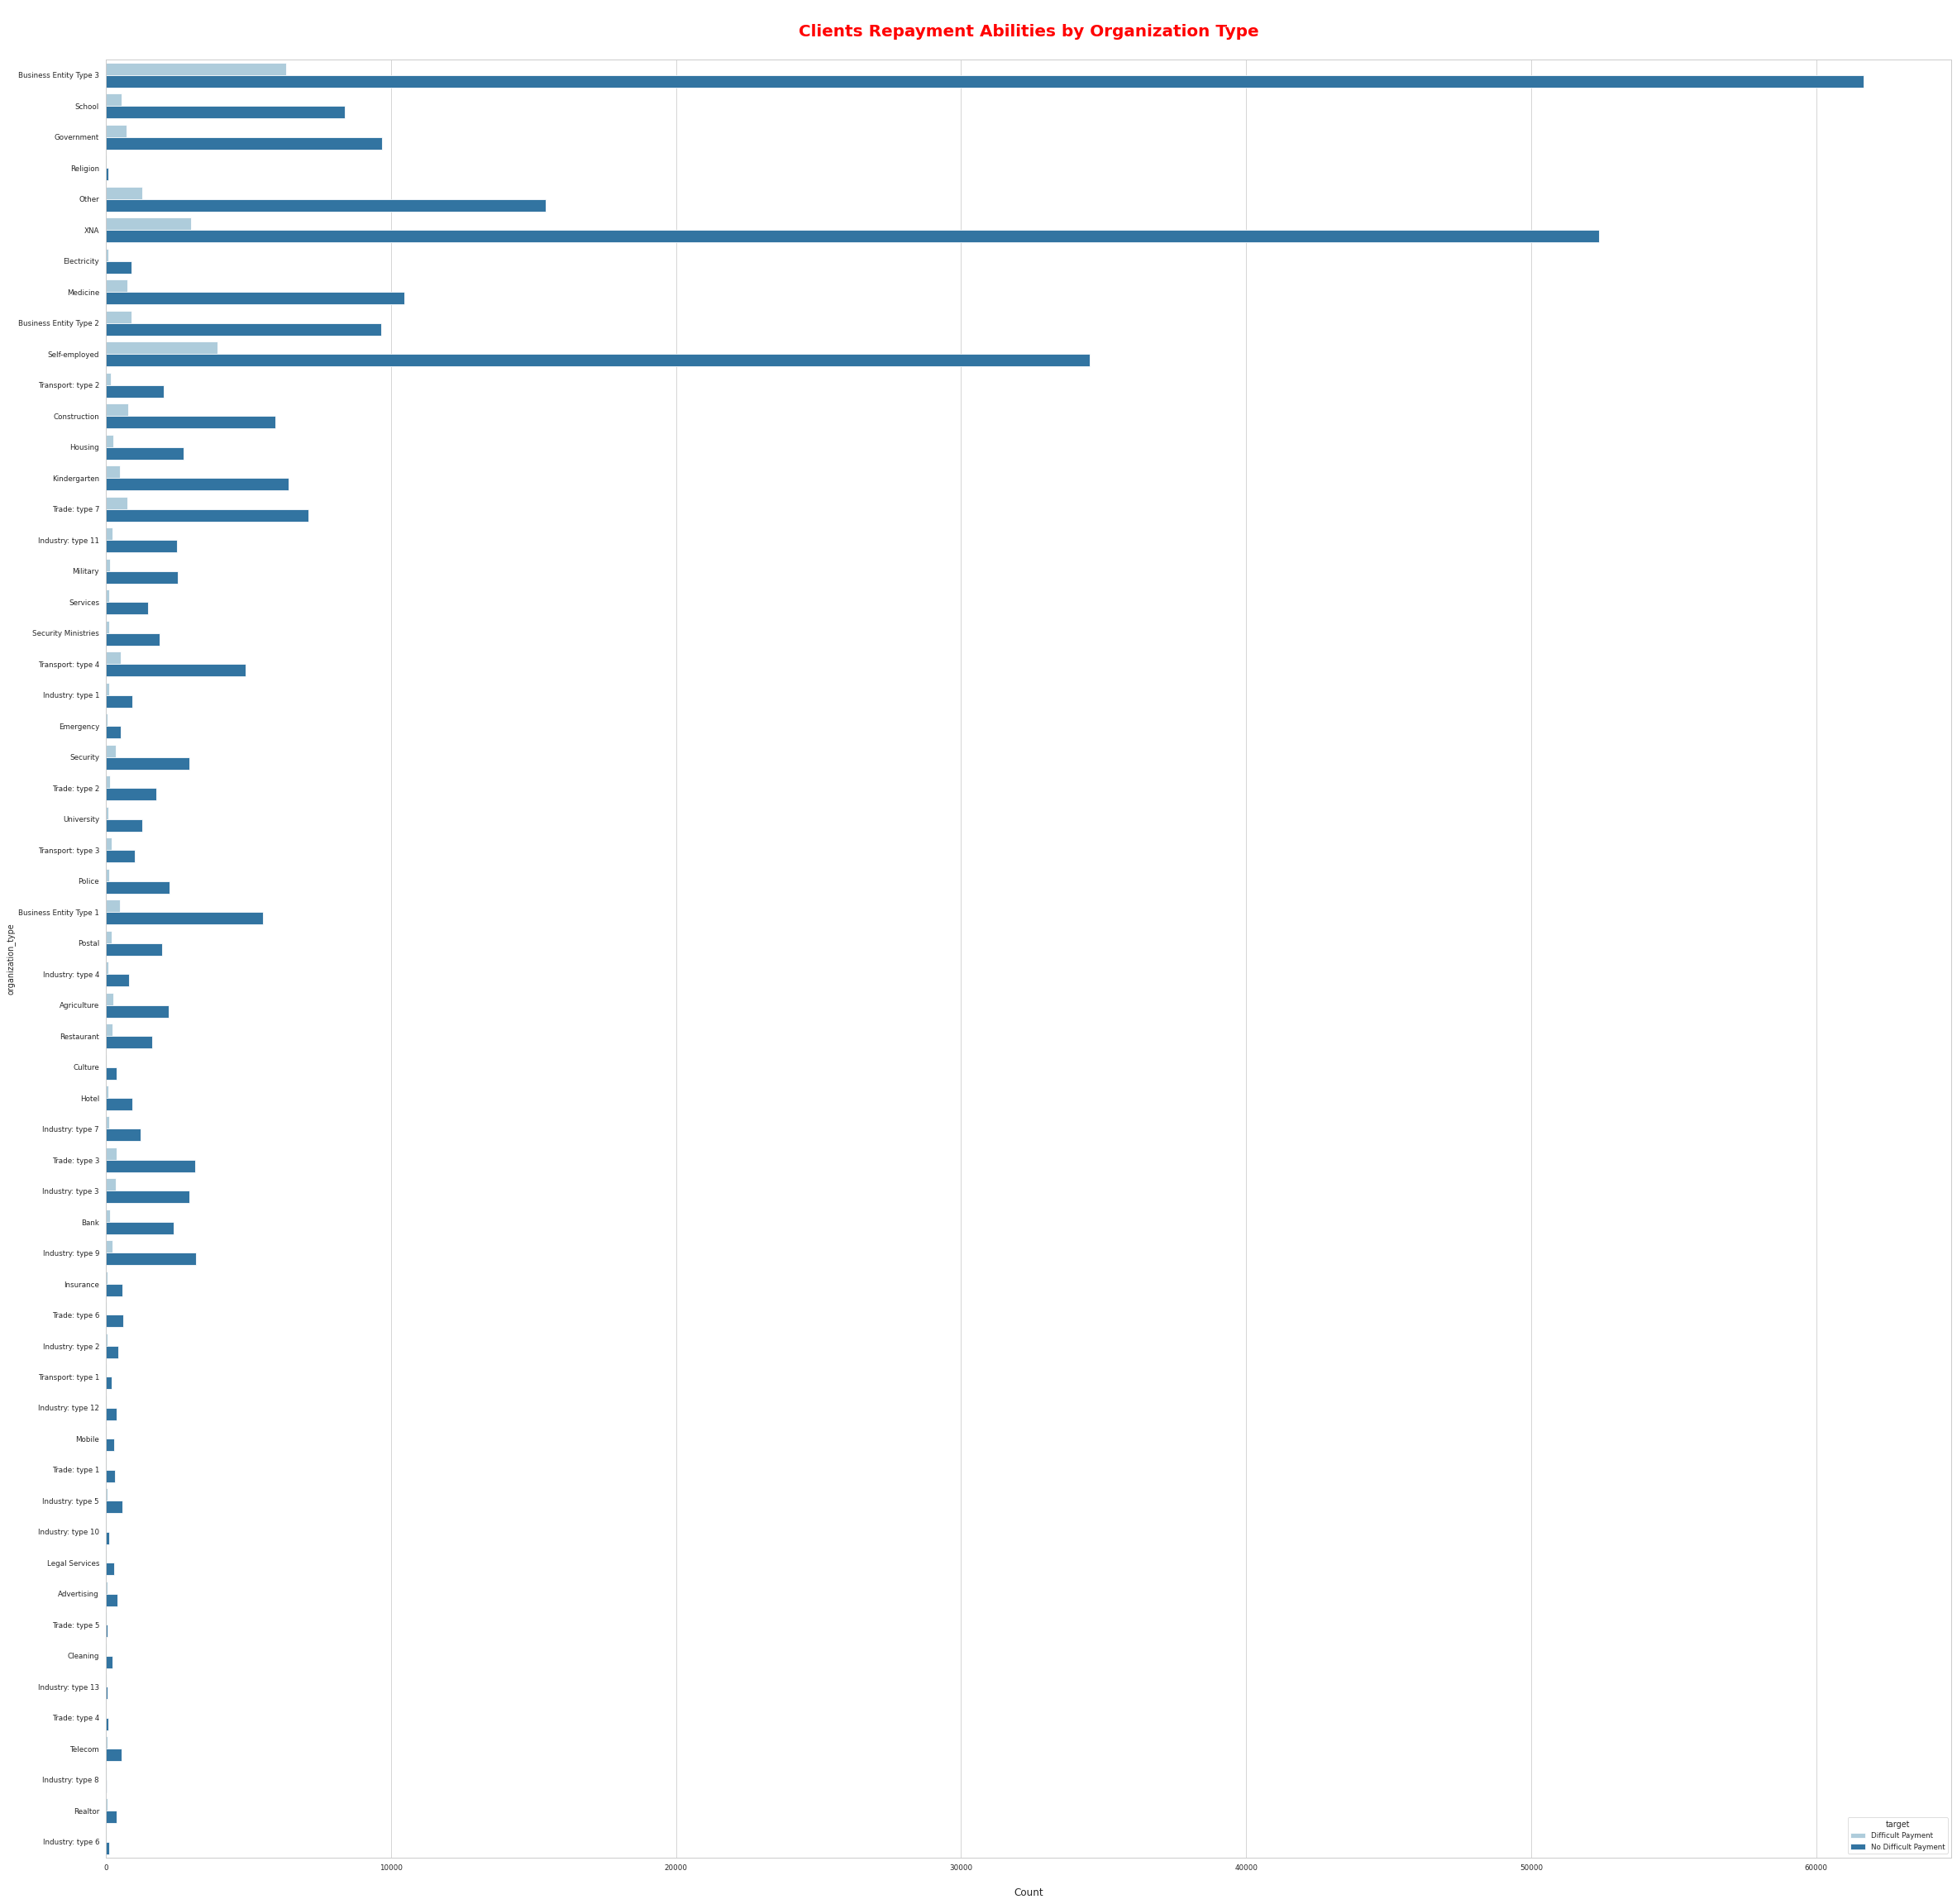

In [52]:
#Data Visualization Clients Repayment Abilities (5)
plt.figure(figsize=(40,40))
fig = sns.countplot(y='organization_type', data = train, hue = 'target', palette = 'Paired')
plt.title('\nClients Repayment Abilities by Organization Type\n', fontweight='bold', fontsize=20, color='red')
plt.xlabel('\nCount', fontsize=12)

**Client Repayment Abilities by Organization Type**

In [53]:
#Client Repayment Abilities by Organization Type
organization_group = train.groupby(by=['organization_type','target']).agg(target_cnt=('target','count')).sort_values(by=['organization_type','target_cnt'], ascending=True).reset_index()
organization_group ['percentage (%)'] = 100 * organization_group['target_cnt'] / organization_group.groupby('organization_type')['target_cnt'].transform('sum')
organization_group.style.background_gradient(cmap='BuGn')

,organization_type,target,target_cnt,percentage (%)
0,Advertising,Difficult Payment,35,8.158508
1,Advertising,No Difficult Payment,394,91.841492
2,Agriculture,Difficult Payment,257,10.472698
3,Agriculture,No Difficult Payment,2197,89.527302
4,Bank,Difficult Payment,130,5.185481
5,Bank,No Difficult Payment,2377,94.814519
6,Business Entity Type 1,Difficult Payment,487,8.138369
7,Business Entity Type 1,No Difficult Payment,5497,91.861631
8,Business Entity Type 2,Difficult Payment,900,8.528381
9,Business Entity Type 2,No Difficult Payment,9653,91.471619


# **Bivariate Analysis**

**Amount Credit Loan**

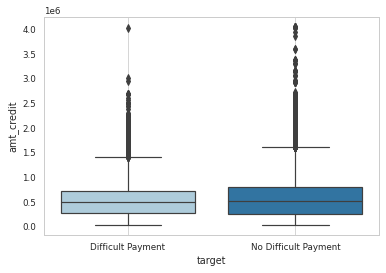

In [54]:
sns.boxplot(x='target', y='amt_credit', data=train, palette = 'Paired')
plt.grid()
plt.show()

**Amount of Income**

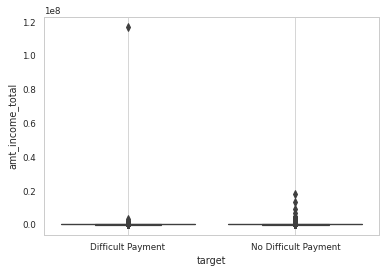

In [55]:
sns.boxplot(x='target', y='amt_income_total', data=train, palette = 'Paired')
plt.grid()
plt.show()

**Client Age**

In [56]:
no_age = df_training[df_training['target']==0]['days_birth'].values/-365
yes_age = df_training[df_training['target']==1]['days_birth'].values/-365

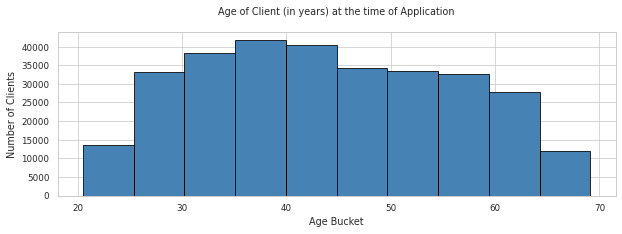

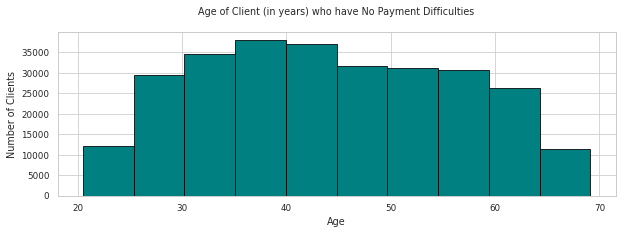

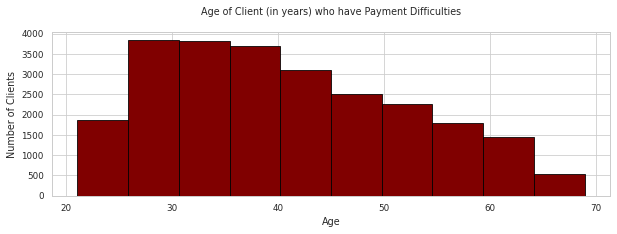

In [57]:
plt.figure(figsize=(10,3))
plt.hist(df_training['days_birth'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# **Multivariate Analysis**

# **Grouped By Realty Owner Status**

**Own Realty, Own Car, Target and Number of Children**

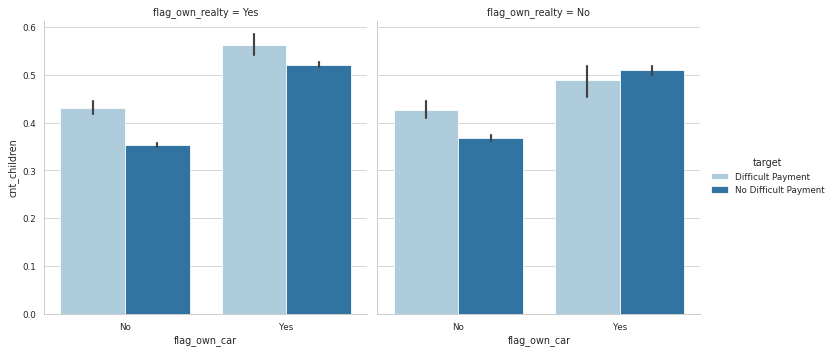

In [58]:
sns.catplot(x = 'flag_own_car',
            y = 'cnt_children', 
            hue = 'target', 
            col = 'flag_own_realty', 
            kind = 'bar', palette = 'Paired',
            data = train)
plt.show()

In [59]:
realtycar_group = train.groupby(by=['flag_own_car','flag_own_realty','target']).agg(children_cnt_mean=('cnt_children','mean')).sort_values(by=['flag_own_car','flag_own_realty','target','children_cnt_mean'], ascending=True).reset_index()
realtycar_group.style.background_gradient(cmap='BuGn')

,flag_own_car,flag_own_realty,target,children_cnt_mean
0,No,No,Difficult Payment,0.427136
1,No,No,No Difficult Payment,0.368351
2,No,Yes,Difficult Payment,0.431275
3,No,Yes,No Difficult Payment,0.353556
4,Yes,No,Difficult Payment,0.488546
5,Yes,No,No Difficult Payment,0.509530
6,Yes,Yes,Difficult Payment,0.563325
7,Yes,Yes,No Difficult Payment,0.521803


**Income Type, Amount Goods Price, Target, Own Realty**

In [60]:
a

In [61]:
income_realty_group = train.groupby(by=['name_income_type','flag_own_realty','target']).agg(amt_goods_price_mean=('amt_goods_price','mean')).sort_values(by=['name_income_type','flag_own_realty','target','amt_goods_price_mean'], ascending=True).reset_index()
income_realty_group['amt_goods_price_mean'] = income_realty_group['amt_goods_price_mean']/1000000 
income_realty_group.style.background_gradient(cmap='BuGn')

,name_income_type,flag_own_realty,target,amt_goods_price_mean
0,Businessman,No,No Difficult Payment,0.922500
1,Businessman,Yes,No Difficult Payment,1.305000
2,Commercial associate,No,Difficult Payment,0.553381
3,Commercial associate,No,No Difficult Payment,0.644585
4,Commercial associate,Yes,Difficult Payment,0.522462
5,Commercial associate,Yes,No Difficult Payment,0.592549
6,Maternity leave,No,No Difficult Payment,0.765000
7,Maternity leave,Yes,Difficult Payment,0.929250
8,Maternity leave,Yes,No Difficult Payment,0.562500
9,Pensioner,No,Difficult Payment,0.497518


# Grouped By Car Ownership Status

**Count Children, Name Contract Type, Target, Own Car**

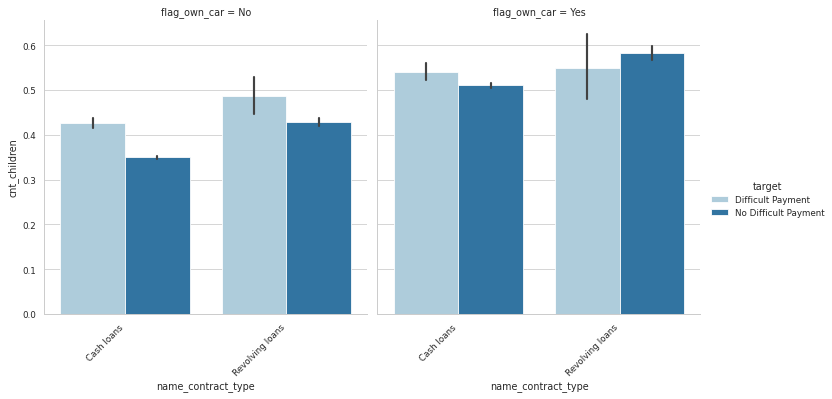

In [62]:
fig = sns.catplot(x = 'name_contract_type',
            y = 'cnt_children', 
            hue = 'target', 
            col = 'flag_own_car', 
            kind = 'bar', palette = 'Paired',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [63]:
contract_car_group = train.groupby(by=['name_contract_type','flag_own_car','target']).agg(cnt_children_mean=('cnt_children','mean')).sort_values(by=['name_contract_type','flag_own_car','target','cnt_children_mean'], ascending=True).reset_index() 
contract_car_group.style.background_gradient(cmap='BuGn')

,name_contract_type,flag_own_car,target,cnt_children_mean
0,Cash loans,No,Difficult Payment,0.425841
1,Cash loans,No,No Difficult Payment,0.350445
2,Cash loans,Yes,Difficult Payment,0.540312
3,Cash loans,Yes,No Difficult Payment,0.510864
4,Revolving loans,No,Difficult Payment,0.488106
5,Revolving loans,No,No Difficult Payment,0.428833
6,Revolving loans,Yes,Difficult Payment,0.550107
7,Revolving loans,Yes,No Difficult Payment,0.582652


# Grouped By Contract Type

**Income Type, Amount Credit, Target and Contract Type**

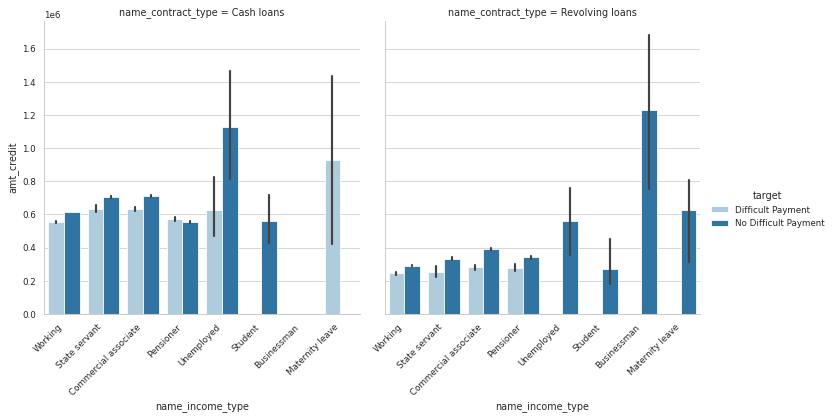

In [64]:
fig = sns.catplot(x = 'name_income_type',
            y = 'amt_credit', 
            hue = 'target', 
            col = 'name_contract_type', 
            kind = 'bar', palette = 'Paired',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [65]:
income_contract_group = train.groupby(by=['name_contract_type','name_income_type','target']).agg(target_cnt=('sk_id_curr','count'),amt_credit_mean=('amt_credit','mean')).sort_values(by=['name_contract_type','name_income_type','target','amt_credit_mean'], ascending=True).reset_index() 
income_contract_group['amt_credit_mean'] = income_contract_group['amt_credit_mean']/1000000 
income_contract_group ['percentage (%)'] = 100 * income_contract_group['target_cnt'] / income_contract_group.groupby(by=['name_contract_type','name_income_type'])['target_cnt'].transform('sum')
income_contract_group.style.background_gradient(cmap='BuGn')

,name_contract_type,name_income_type,target,target_cnt,amt_credit_mean,percentage (%)
0,Cash loans,Commercial associate,Difficult Payment,4990,0.631508,7.839502
1,Cash loans,Commercial associate,No Difficult Payment,58662,0.711446,92.160498
2,Cash loans,Maternity leave,Difficult Payment,2,0.929250,100.000000
3,Cash loans,Pensioner,Difficult Payment,2842,0.571824,5.466120
4,Cash loans,Pensioner,No Difficult Payment,49151,0.554798,94.533880
5,Cash loans,State servant,Difficult Payment,1188,0.633412,5.989111
6,Cash loans,State servant,No Difficult Payment,18648,0.705976,94.010889
7,Cash loans,Student,No Difficult Payment,15,0.558945,100.000000
8,Cash loans,Unemployed,Difficult Payment,8,0.626625,53.333333
9,Cash loans,Unemployed,No Difficult Payment,7,1.126929,46.666667


# **Grouped By Rating of Region**

**Housing Type, Amount Credit of Loan, Target, and Rating of Region**

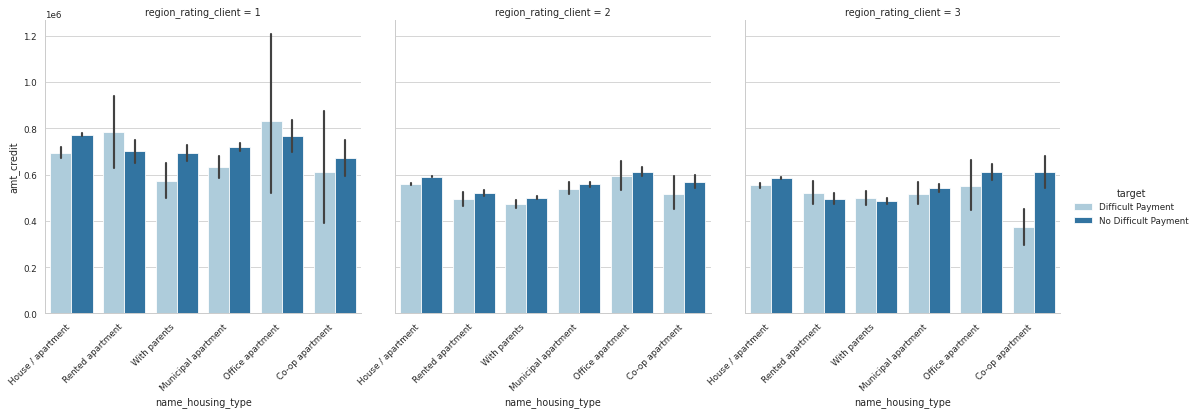

In [66]:
fig = sns.catplot(x = 'name_housing_type',
            y = 'amt_credit', 
            hue = 'target', 
            col = 'region_rating_client', 
            kind = 'bar', palette = 'Paired',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [67]:
region_housing_group = train.groupby(by=['name_housing_type','region_rating_client','target']).agg(target_cnt=('sk_id_curr','count'),amt_credit_mean=('amt_credit','mean')).sort_values(by=['name_housing_type','region_rating_client','target','amt_credit_mean'], ascending=True).reset_index() 
region_housing_group['region_rating_client'] = region_housing_group['region_rating_client'].astype('str')
region_housing_group['amt_credit_mean'] = region_housing_group['amt_credit_mean']/1000000 
region_housing_group ['percentage (%)'] = 100 * region_housing_group['target_cnt'] / region_housing_group.groupby(by=['name_housing_type','region_rating_client'])['target_cnt'].transform('sum')
region_housing_group.style.background_gradient(cmap='BuGn')

,name_housing_type,region_rating_client,target,target_cnt,amt_credit_mean,percentage (%)
0,Co-op apartment,1,Difficult Payment,9,0.609946,6.976744
1,Co-op apartment,1,No Difficult Payment,120,0.669829,93.023256
2,Co-op apartment,2,Difficult Payment,70,0.517362,8.168028
3,Co-op apartment,2,No Difficult Payment,787,0.568846,91.831972
4,Co-op apartment,3,Difficult Payment,10,0.372022,7.352941
5,Co-op apartment,3,No Difficult Payment,126,0.610616,92.647059
6,House / apartment,1,Difficult Payment,1271,0.694041,4.651418
7,House / apartment,1,No Difficult Payment,26054,0.772728,95.348582
8,House / apartment,2,Difficult Payment,15461,0.558368,7.615806
9,House / apartment,2,No Difficult Payment,187551,0.590510,92.384194


**Education Type, Amount Credit of Loan, Target, and Rating of Region**

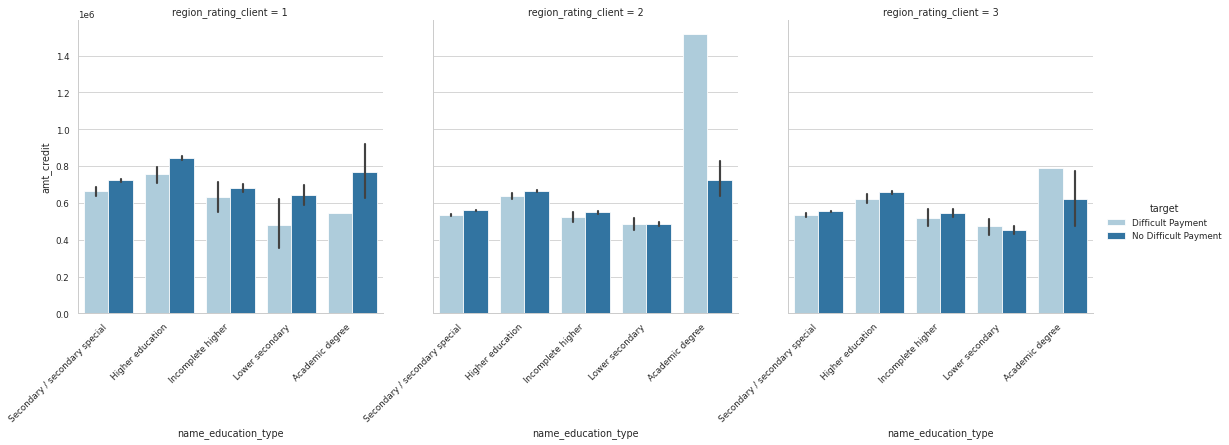

In [68]:
fig = sns.catplot(x = 'name_education_type',
            y = 'amt_credit', 
            hue = 'target', 
            col = 'region_rating_client', 
            kind = 'bar', palette = 'Paired',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [69]:
region_edu_group = train.groupby(by=['name_education_type','region_rating_client','target']).agg(target_cnt=('sk_id_curr','count'),amt_credit_mean=('amt_credit','mean')).sort_values(by=['name_education_type','region_rating_client','target','amt_credit_mean'], ascending=True).reset_index() 
region_edu_group['region_rating_client'] = region_edu_group['region_rating_client'].astype('str')
region_edu_group['amt_credit_mean'] = region_edu_group['amt_credit_mean']/1000000 
region_edu_group ['percentage (%)'] = 100 * region_edu_group['target_cnt'] / region_edu_group.groupby(by=['name_education_type','region_rating_client'])['target_cnt'].transform('sum')
region_edu_group.style.background_gradient(cmap='BuGn')

,name_education_type,region_rating_client,target,target_cnt,amt_credit_mean,percentage (%)
0,Academic degree,1,Difficult Payment,1,0.544491,2.564103
1,Academic degree,1,No Difficult Payment,38,0.767734,97.435897
2,Academic degree,2,Difficult Payment,1,1.515416,1.020408
3,Academic degree,2,No Difficult Payment,97,0.726661,98.979592
4,Academic degree,3,Difficult Payment,1,0.790830,3.703704
5,Academic degree,3,No Difficult Payment,26,0.620993,96.296296
6,Higher education,1,Difficult Payment,388,0.754934,3.366886
7,Higher education,1,No Difficult Payment,11136,0.842930,96.633114
8,Higher education,2,Difficult Payment,2780,0.637858,5.320065
9,Higher education,2,No Difficult Payment,49475,0.665853,94.679935


**Family Status, Amount Credit of Loan, Target, and Rating of Region**

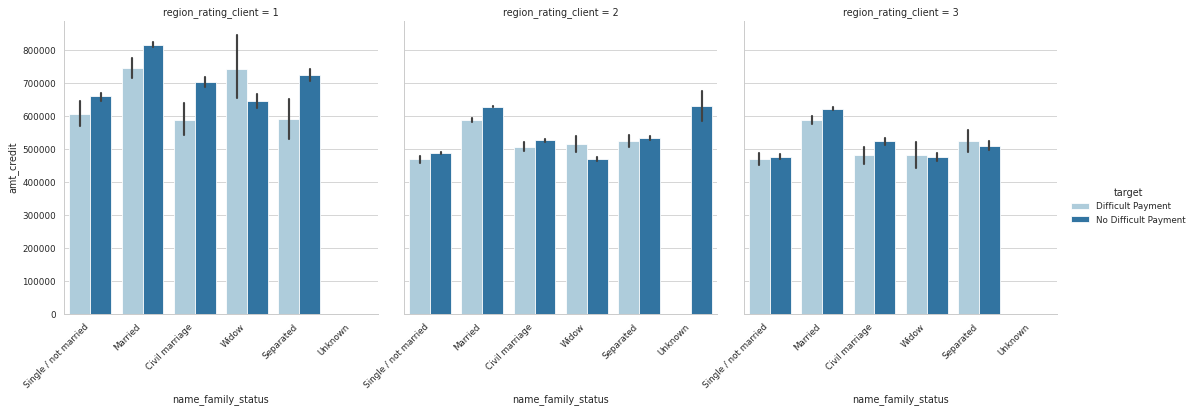

In [70]:
fig = sns.catplot(x = 'name_family_status',
            y = 'amt_credit', 
            hue = 'target', 
            col = 'region_rating_client', 
            kind = 'bar', palette = 'Paired',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [71]:
region_family_group = train.groupby(by=['name_family_status','region_rating_client','target']).agg(target_cnt=('sk_id_curr','count'),amt_credit_mean=('amt_credit','mean')).sort_values(by=['name_family_status','target','amt_credit_mean'], ascending=True).reset_index() 
region_family_group['region_rating_client'] = region_family_group['region_rating_client'].astype('str')
region_family_group['amt_credit_mean'] = round(region_family_group['amt_credit_mean'],0)
region_family_group ['percentage (%)'] = 100 * region_family_group['target_cnt'] / region_family_group.groupby(by=['name_family_status','region_rating_client'])['target_cnt'].transform('sum')
region_family_group.style.background_gradient(cmap='BuGn')

,name_family_status,region_rating_client,target,target_cnt,amt_credit_mean,percentage (%)
0,Civil marriage,3,Difficult Payment,678,480622.000000,13.950617
1,Civil marriage,2,Difficult Payment,2069,505485.000000,9.487344
2,Civil marriage,1,Difficult Payment,214,588803.000000,6.887673
3,Civil marriage,3,No Difficult Payment,4182,523429.000000,86.049383
4,Civil marriage,2,No Difficult Payment,19739,526938.000000,90.512656
5,Civil marriage,1,No Difficult Payment,2893,704263.000000,93.112327
6,Married,3,Difficult Payment,3234,587901.000000,10.435288
7,Married,2,Difficult Payment,10789,588366.000000,7.393625
8,Married,1,Difficult Payment,827,746928.000000,4.237114
9,Married,3,No Difficult Payment,27757,621881.000000,89.564712


# **Data Cleaning**

**Detecting Duplicate Data**

In [72]:
print('The number of duplicate data is:',train.duplicated().sum())
# there is no duplication

The number of duplicate data is: 0


**Detecting Missing Values**

In [73]:
# check for empty elements
print('Missing values status:', train.isnull().values.any())
train_null = pd.DataFrame(train.isnull().sum(), columns=['Total Null Values'])
train_null['Percentage'] = (train_null['Total Null Values']/train.shape[0])*100
train_null = train_null.sort_values(by=['Percentage'], ascending=False).reset_index()
train_null

Missing values status: True


,index,Total Null Values,Percentage
0,commonarea_medi,214865,69.872297
1,commonarea_avg,214865,69.872297
2,commonarea_mode,214865,69.872297
3,nonlivingapartments_mode,213514,69.432963
4,nonlivingapartments_avg,213514,69.432963
5,nonlivingapartments_medi,213514,69.432963
6,fondkapremont_mode,210295,68.386172
7,livingapartments_mode,210199,68.354953
8,livingapartments_avg,210199,68.354953
9,livingapartments_medi,210199,68.354953


In [74]:
train.info(max_cols=200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    sk_id_curr                    307511 non-null  int64  
 1    target                        307511 non-null  object 
 2    name_contract_type            307511 non-null  object 
 3    code_gender                   307511 non-null  object 
 4    flag_own_car                  307511 non-null  object 
 5    flag_own_realty               307511 non-null  object 
 6    cnt_children                  307511 non-null  int64  
 7    amt_income_total              307511 non-null  float64
 8    amt_credit                    307511 non-null  float64
 9    amt_annuity                   307499 non-null  float64
 10   amt_goods_price               307233 non-null  float64
 11   name_type_suite               306219 non-null  object 
 12   name_income_type            

In [75]:
#drop columns that have large number of missing values (more than 50%)
train.drop(train.iloc[:, 44:91], inplace=True, axis=1)
train.drop(['own_car_age','ext_source_1'], inplace=True, axis=1)

In [76]:
# check for empty elements after drop some features
print('Missing values status:', train.isnull().values.any())
train_null = pd.DataFrame(train.isnull().sum(), columns=['Total Null Values'])
train_null['Percentage'] = (train_null['Total Null Values']/train.shape[0])*100
train_null = train_null.sort_values(by=['Percentage'], ascending=False).reset_index()
train_null

Missing values status: True


,index,Total Null Values,Percentage
0,occupation_type,96391,31.345545
1,ext_source_3,60965,19.825307
2,amt_req_credit_bureau_year,41519,13.501631
3,amt_req_credit_bureau_qrt,41519,13.501631
4,amt_req_credit_bureau_mon,41519,13.501631
5,amt_req_credit_bureau_week,41519,13.501631
6,amt_req_credit_bureau_day,41519,13.501631
7,amt_req_credit_bureau_hour,41519,13.501631
8,name_type_suite,1292,0.420148
9,obs_30_cnt_social_circle,1021,0.332021


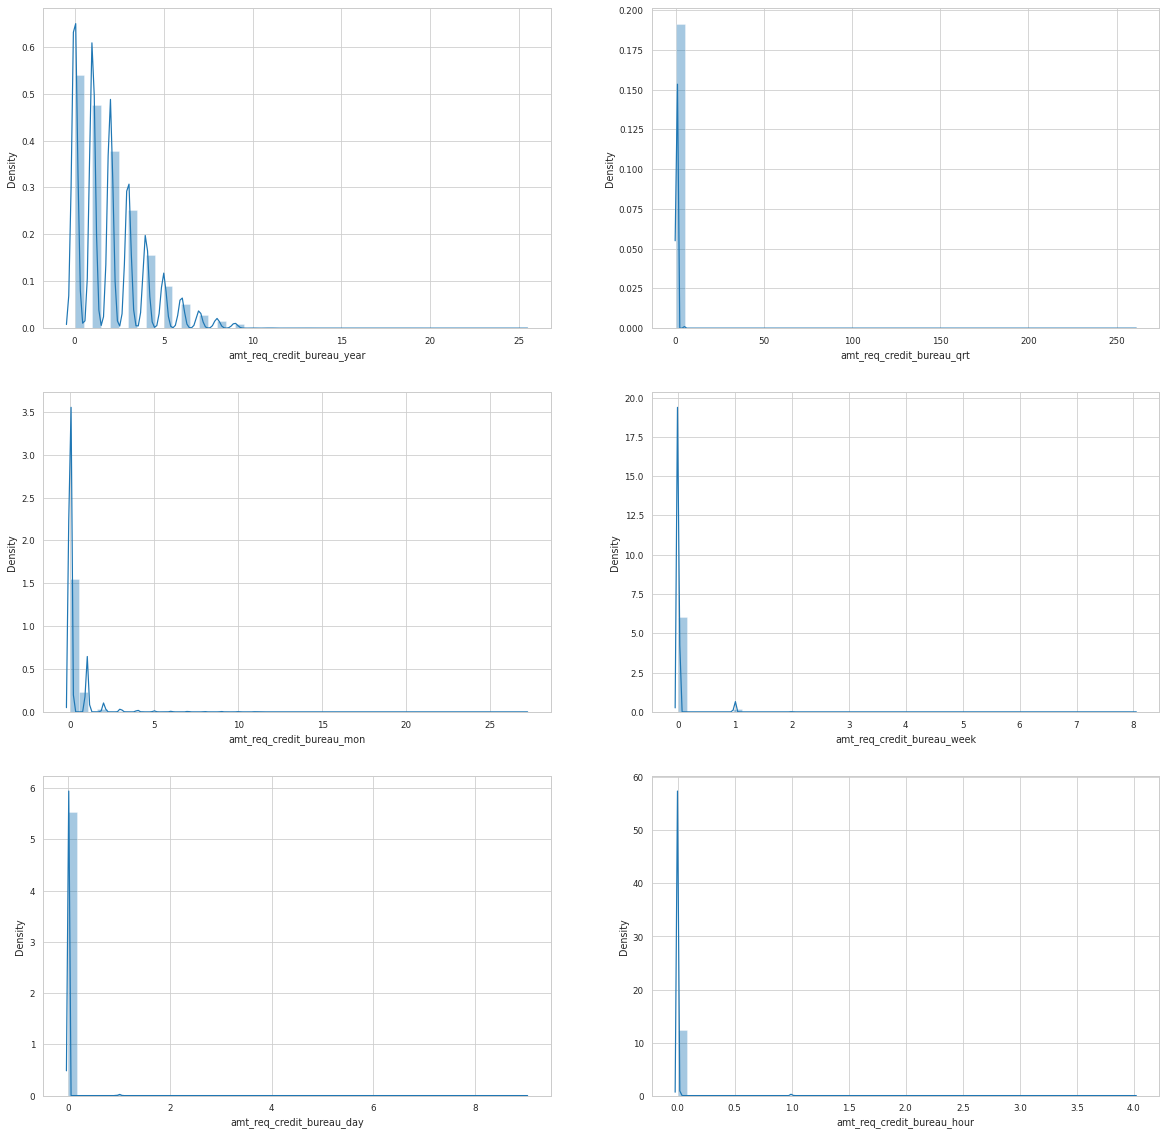

In [77]:
# distribution of numerical features that have missing values (1)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(train['amt_req_credit_bureau_year'], ax=ax[0][0])

sns.distplot(train['amt_req_credit_bureau_qrt'], ax=ax[0][1])

sns.distplot(train['amt_req_credit_bureau_mon'], ax=ax[1][0])

sns.distplot(train['amt_req_credit_bureau_week'], ax=ax[1][1])

sns.distplot(train['amt_req_credit_bureau_day'], ax=ax[2][0])

sns.distplot(train['amt_req_credit_bureau_hour'], ax=ax[2][1])

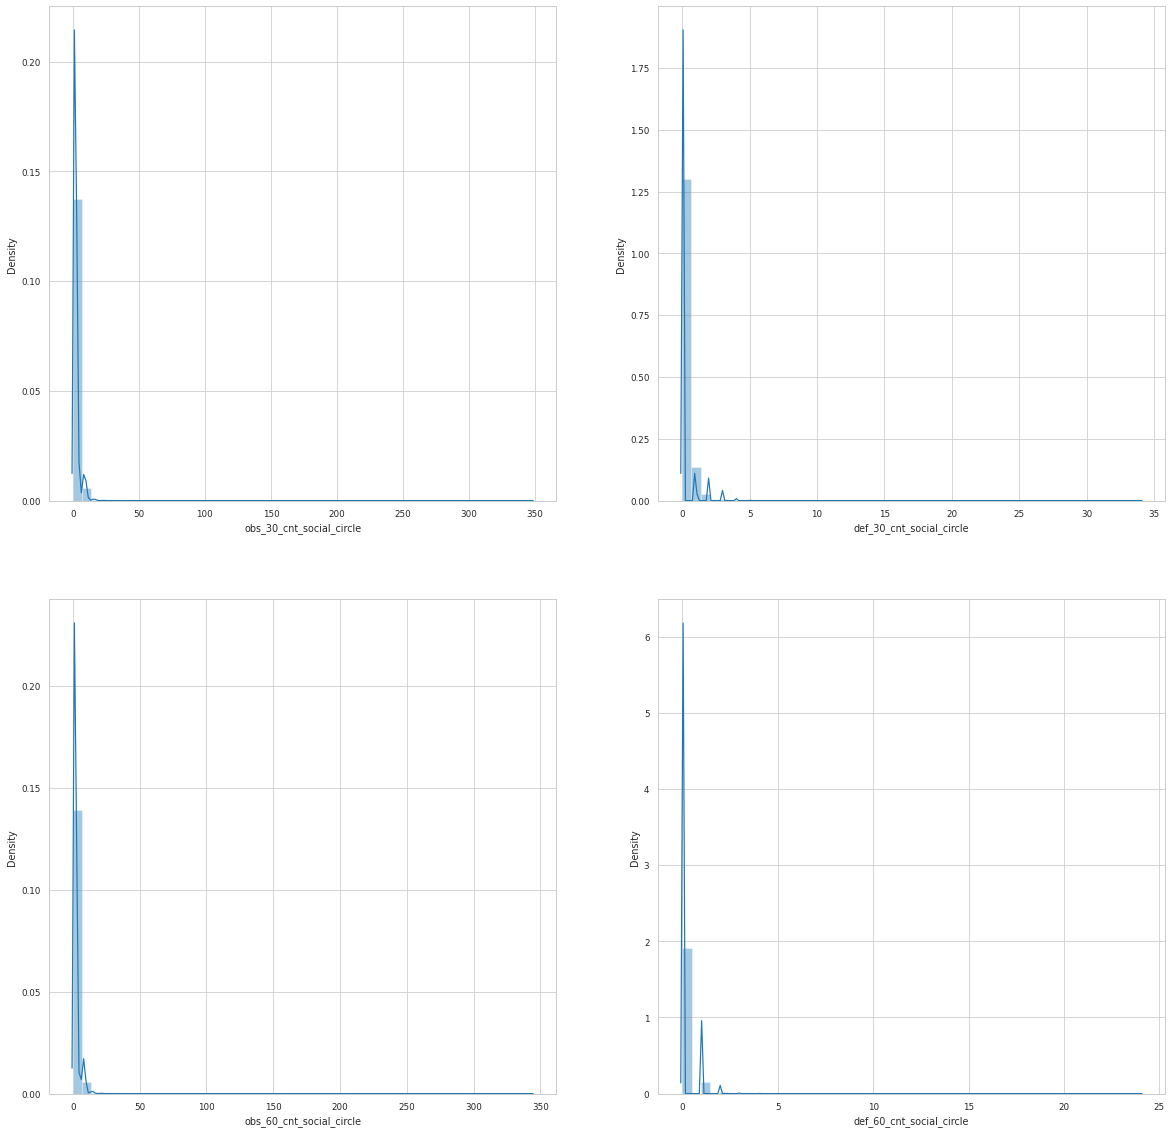

In [78]:
# distribution of numerical features that have missing values (2)
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(train['obs_30_cnt_social_circle'], ax=ax[0][0])

sns.distplot(train['def_30_cnt_social_circle'], ax=ax[0][1])

sns.distplot(train['obs_60_cnt_social_circle'], ax=ax[1][0])

sns.distplot(train['def_60_cnt_social_circle'], ax=ax[1][1])

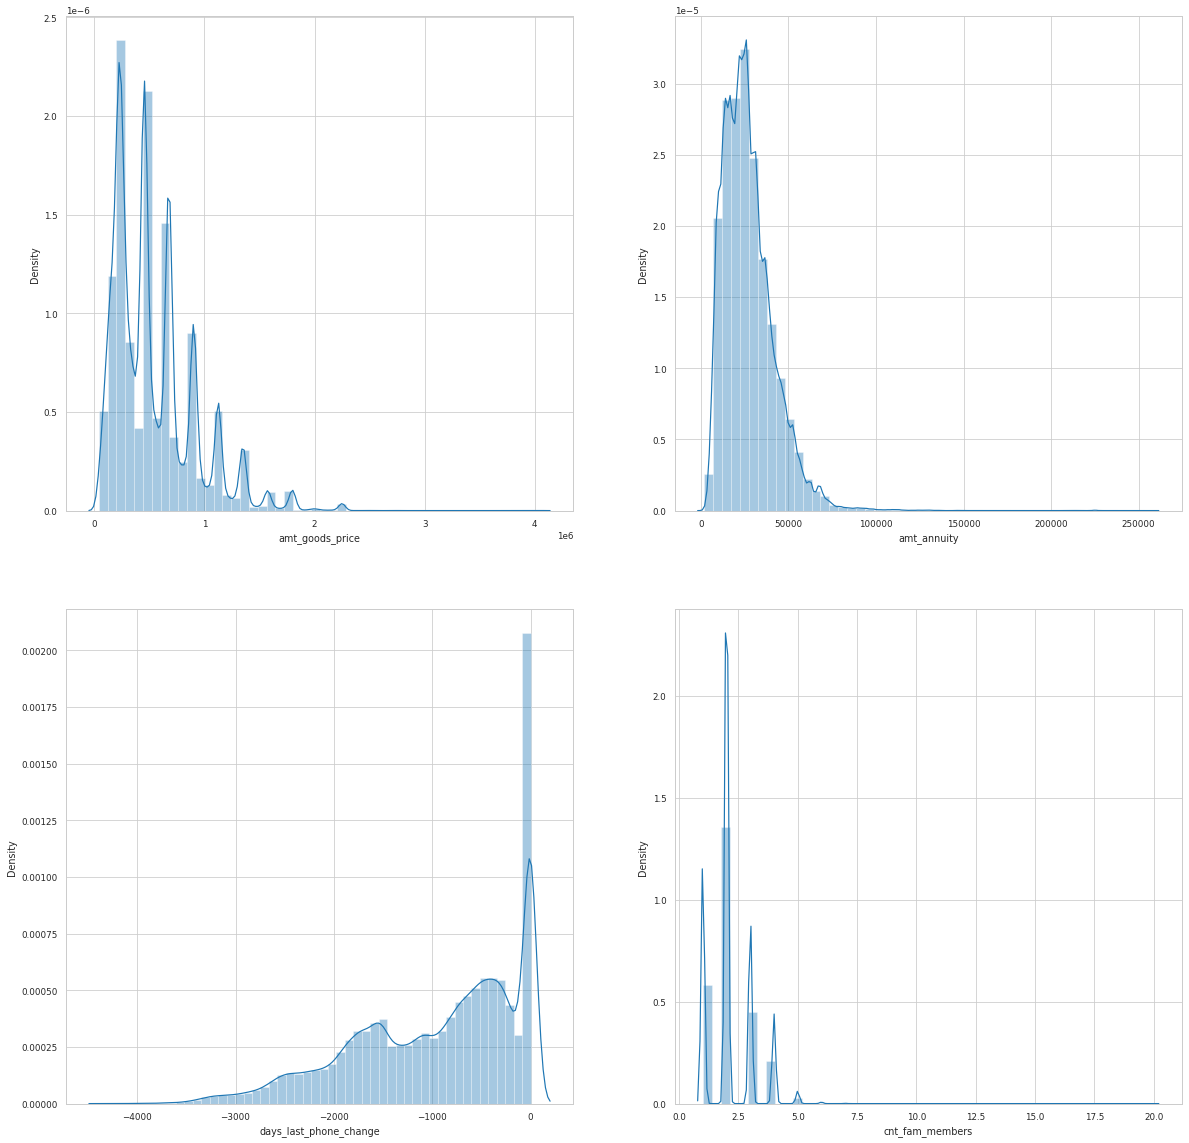

In [79]:
# distribution of numerical features that have missing values (3)
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(train['amt_goods_price'], ax=ax[0][0])

sns.distplot(train['amt_annuity'], ax=ax[0][1])

sns.distplot(train['days_last_phone_change'], ax=ax[1][0])

sns.distplot(train['cnt_fam_members'], ax=ax[1][1])

In [80]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = train.select_dtypes(include=['object']).columns.tolist()
integer_columns = train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in train:
    if train[column].isnull().any():
        if(column in category_columns):
            train[column]=train[column].fillna(train[column].mode()[0])
        else:
            train[column]=train[column].fillna(train[column].median())

In [81]:
# check for empty elements after imputation
print('Missing values status:', train.isnull().values.any())
train_null = pd.DataFrame(train.isnull().sum(), columns=['Total Null Values'])
train_null['Percentage'] = (train_null['Total Null Values']/train.shape[0])*100
train_null = train_null.sort_values(by=['Percentage'], ascending=False).reset_index()
train_null

Missing values status: False


,index,Total Null Values,Percentage
0,sk_id_curr,0,0.0
1,reg_city_not_work_city,0,0.0
2,flag_document_8,0,0.0
3,flag_document_7,0,0.0
4,flag_document_6,0,0.0
5,flag_document_5,0,0.0
6,flag_document_4,0,0.0
7,flag_document_3,0,0.0
8,flag_document_2,0,0.0
9,days_last_phone_change,0,0.0


# **Detecting Outliers**

In [82]:
train.info(max_cols=200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  object 
 2   name_contract_type           307511 non-null  object 
 3   code_gender                  307511 non-null  object 
 4   flag_own_car                 307511 non-null  object 
 5   flag_own_realty              307511 non-null  object 
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307511 non-null  float64
 10  amt_goods_price              307511 non-null  float64
 11  name_type_suite              307511 non-null  object 
 12  name_income_type             307511 non-null  object 
 13 

In [83]:
# dataset that only consist numerical features (1)
int_features = train[['cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price']]

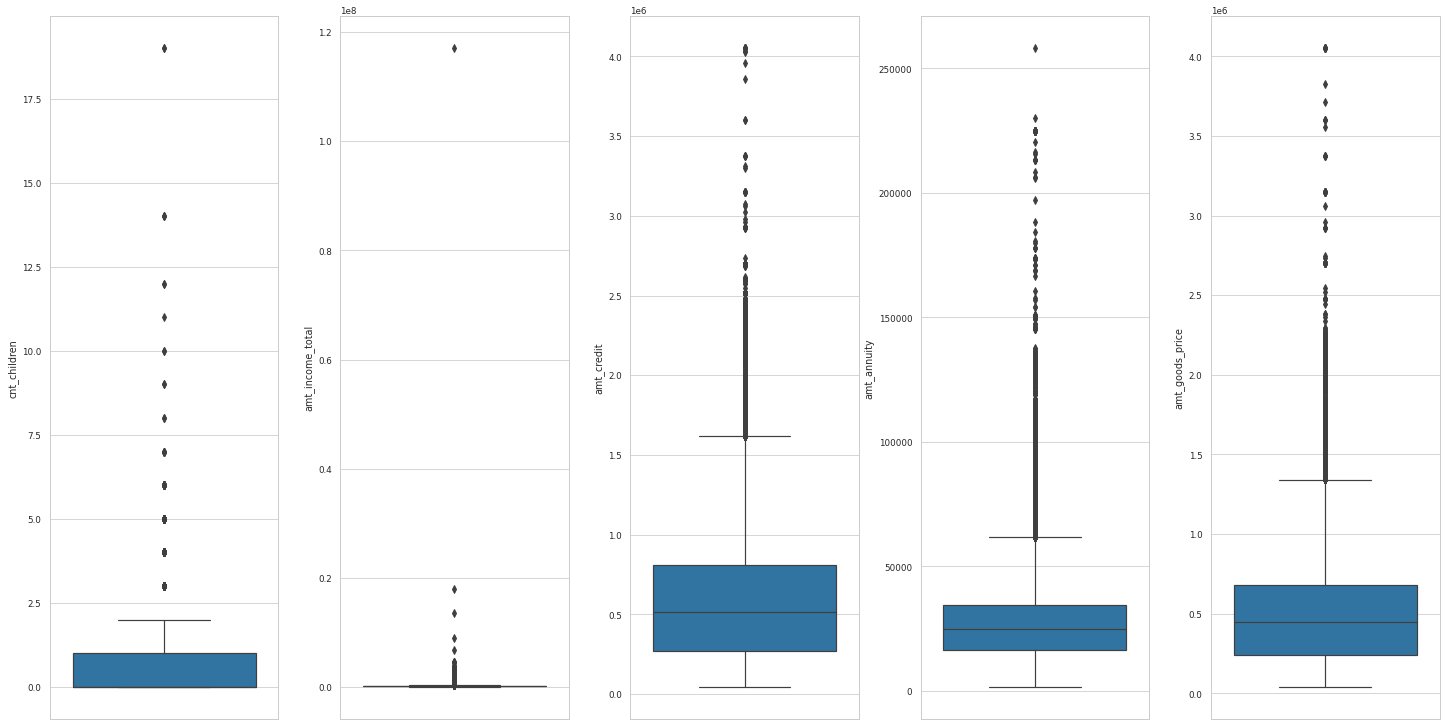

In [84]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [85]:
# dataset that only consist numerical features (2)
int_features = train[['days_birth', 'days_employed', 'days_registration', 'days_id_publish', 'cnt_fam_members']]

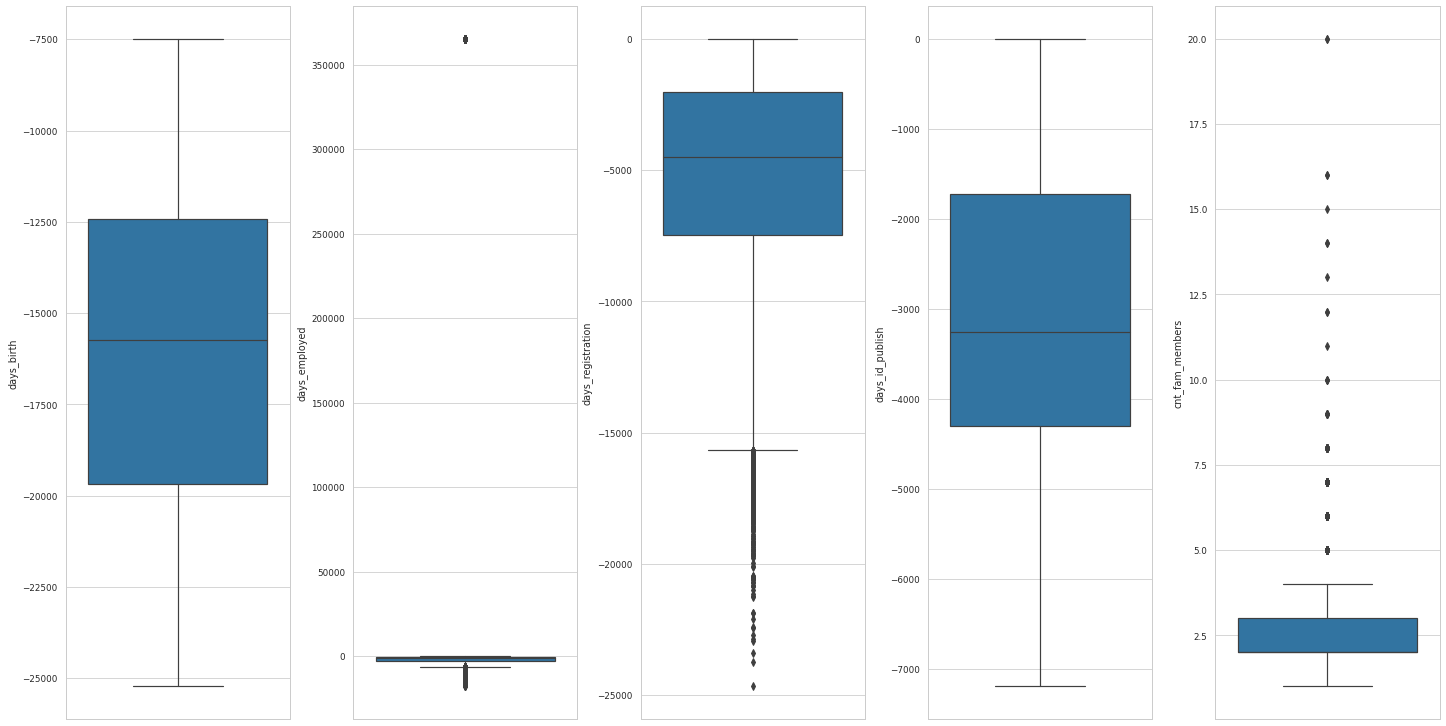

In [86]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [87]:
# dataset that only consist numerical features (3)
int_features = train[['obs_30_cnt_social_circle', 'def_30_cnt_social_circle', 'obs_60_cnt_social_circle', 'def_60_cnt_social_circle']]

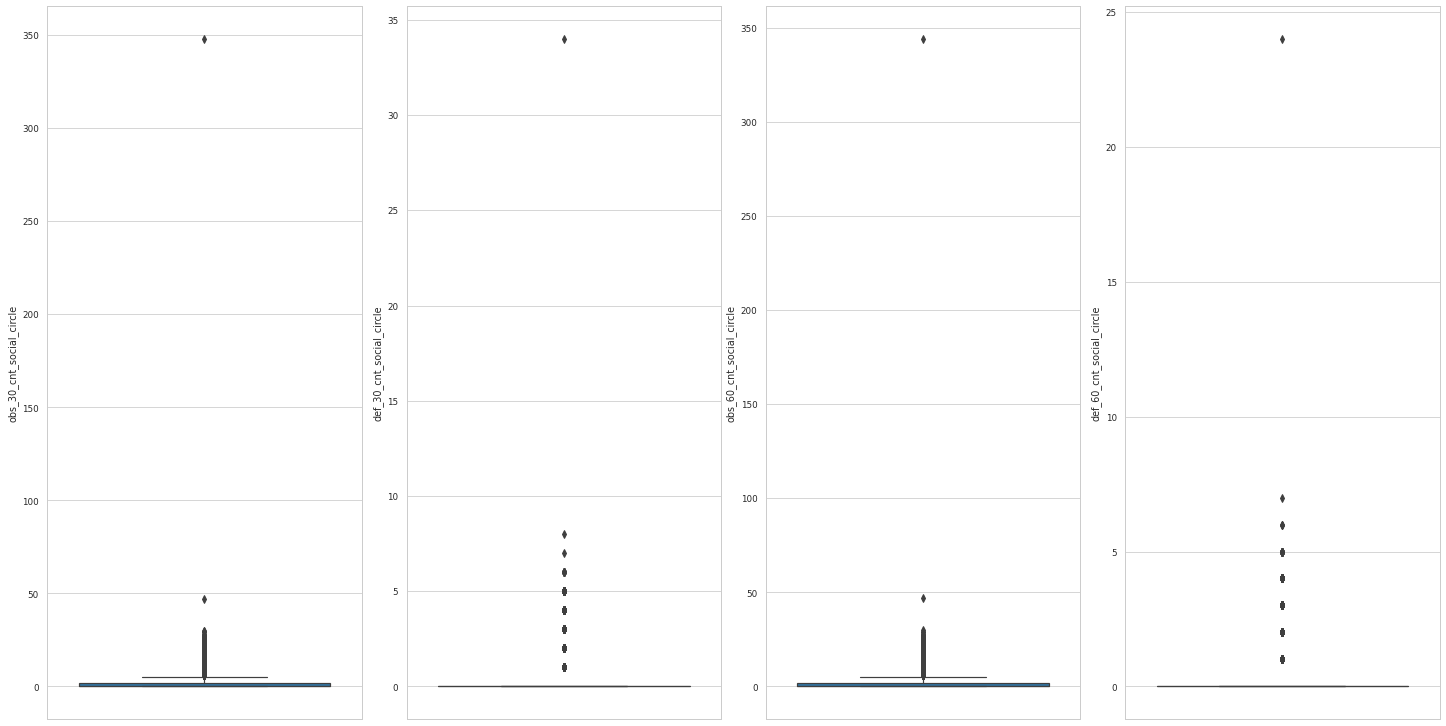

In [88]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [89]:
# dataset that only consist numerical features (4)
int_features = train[['region_rating_client','hour_appr_process_start','days_last_phone_change','flag_document_2','amt_req_credit_bureau_qrt']]

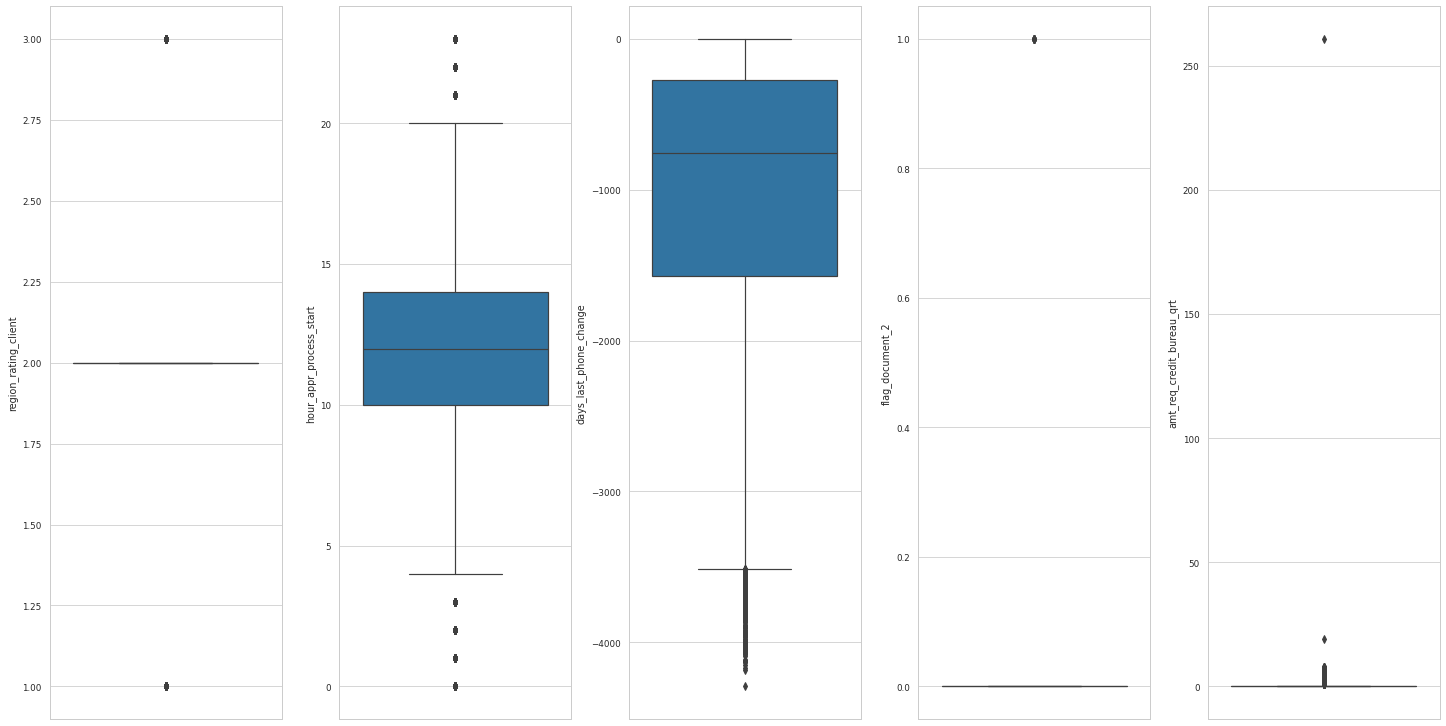

In [90]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outliers on the numerical features mentioned above will not be removed because there may be insights that can be drawn from these outliers.

In [91]:
def dummy_var(target):
  if target == 'No Difficult Payment':
    return 0
  elif target == 'Difficult Payment':
    return 1

train['target'] = train['target'].apply(dummy_var)

In [92]:
# label encoder for object features
train[['code_gender', 'name_contract_type', 'flag_own_car', 'flag_own_realty', 
          'name_type_suite', 'name_income_type', 'name_education_type', 'name_family_status',
         'name_housing_type', 'occupation_type', 'weekday_appr_process_start', 'organization_type']] = train[['code_gender','name_contract_type', 'flag_own_car', 'flag_own_realty', 
          'name_type_suite', 'name_income_type', 'name_education_type', 'name_family_status',
         'name_housing_type', 'occupation_type', 'weekday_appr_process_start', 'organization_type']].apply(LabelEncoder().fit_transform)

In [93]:
train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# **Convert Negative Values to Positive Values**

the features that have negative values are `days_birth`, `days_employed`, `days_id_publish`, `days_registration`, and `days_last_phone_change`

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  int64  
 2   name_contract_type           307511 non-null  int64  
 3   code_gender                  307511 non-null  int64  
 4   flag_own_car                 307511 non-null  int64  
 5   flag_own_realty              307511 non-null  int64  
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307511 non-null  float64
 10  amt_goods_price              307511 non-null  float64
 11  name_type_suite              307511 non-null  int64  
 12  name_income_type             307511 non-null  int64  
 13 

In [95]:
train.iloc[:,17:21] = train.iloc[:,17:21].abs()
train.iloc[:,46] = train.iloc[:,46].abs()

In [96]:
#data check after convert to positive values
train.iloc[1:6,17:21]

,days_birth,days_employed,days_registration,days_id_publish
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
5,16941,1588,4970.0,477


In [97]:
#data check after convert to positive values
train.iloc[1:6,46]

1     828.0
2     815.0
3     617.0
4    1106.0
5    2536.0
Name: days_last_phone_change, dtype: float64

**Feature Selection**

In [98]:
train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
x = train.drop(['target'], axis=1)
y = train['target']

In [100]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=True)

The features that correlate well with target feature:



,Features,Score
20,flag_mobil,2.855786e-07
23,flag_cont_mobile,7.863447e-05
66,amt_req_credit_bureau_hour,1.832008e-03
64,flag_document_20,1.425955e-02
49,flag_document_5,3.020010e-02
56,flag_document_12,1.756366e-01
63,flag_document_19,5.663612e-01
54,flag_document_10,6.147280e-01
68,amt_req_credit_bureau_week,6.416067e-01
51,flag_document_7,7.098728e-01


It can be seen which features correlate well with payment difficulties.
1.   **Best features**: days_employed, amt_goods_price, and amt_credit
2.   **Worst features**: flag_mobil, flag_cont_mobile, and amt_req_credit_bureau_hour

In [101]:
# # create two different dataframe of majority and minority class 
# df_major = train[train['target']==0] 
# df_minor = train[train['target']==1] 

# # upsample minority class
# df_minor_upsampled = resample(df_minor, 
#                               replace=True,    # sample with replacement
#                               n_samples= 282686, # to match majority class
#                               random_state=42)  # reproducible results

# # combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_minor_upsampled, df_major])

In [102]:
# fig = plt.figure(figsize = (12,7))
# df_upsampled['target'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
# plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
# plt.ylabel('Percentage of the Customers\n', fontsize=12)
# plt.xlabel('\nPayment Difficulty Status', fontsize=12)
# plt.show()

It can be seen that the data is balanced, so the analysis can be continued

# **Data Splitting**

In [103]:
# define x and y features (top 20 features)
x_balanced = train[['days_employed', 'amt_goods_price', 'amt_credit', 
                           'days_birth', 'amt_income_total', 'days_registration', 
                           'days_last_phone_change', 'days_id_publish', 'amt_annuity', 
                           'organization_type', 'name_income_type', 'reg_city_not_work_city',
                          'code_gender', 'ext_source_2', 'reg_city_not_live_city', 'name_education_type',
                          'def_30_cnt_social_circle', 'ext_source_3', 'def_60_cnt_social_circle', 'live_city_not_work_city']]
y_balanced = train['target']



# x_balanced = df_upsampled[['days_employed', 'amt_goods_price', 'amt_credit', 
#                            'days_birth', 'amt_income_total', 'days_registration', 
#                            'days_last_phone_change', 'days_id_publish', 'amt_annuity', 
#                            'organization_type', 'name_income_type', 'reg_city_not_work_city',
#                           'code_gender', 'ext_source_2', 'reg_city_not_live_city', 'name_education_type',
#                           'def_30_cnt_social_circle', 'ext_source_3', 'def_60_cnt_social_circle', 'live_city_not_work_city']]
# y_balanced = df_upsampled['target']

In [104]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(246008, 20) (61503, 20)


In [105]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Model Building**

Here are some algorithms that will be tested to determine the best model:

1.   Logistic Regression
2.   Gaussian Naive Bayes
3.   Decision Tree
4.   Random Forest

**1. Logistic Regression**

In [106]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [107]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226132
           1       0.47      0.01      0.01     19876

    accuracy                           0.92    246008
   macro avg       0.69      0.50      0.49    246008
weighted avg       0.88      0.92      0.88    246008



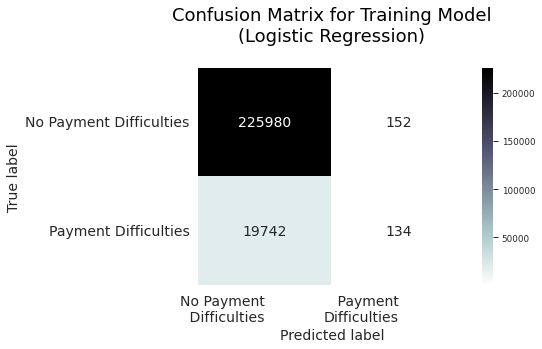

In [108]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\n Difficulties', ' Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [109]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.43      0.01      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.68      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



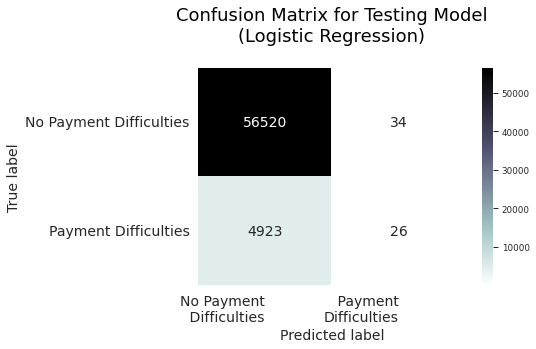

In [110]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)),  ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\n Difficulties', ' Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [111]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 91.91
Test Accuracy: % 91.94




It can be seen that:

*    Logistic regression model gives 67.16% correct results.
*   There is 0.13% error margin.



In [112]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.5023


**2. Gaussian Naive Bayes**

In [113]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [114]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.93      0.90      0.92    226132
           1       0.19      0.26      0.22     19876

    accuracy                           0.85    246008
   macro avg       0.56      0.58      0.57    246008
weighted avg       0.87      0.85      0.86    246008



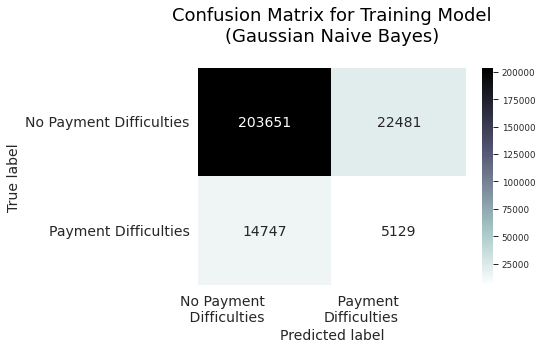

In [115]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\n Difficulties', ' Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [116]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     56554
           1       0.19      0.27      0.22      4949

    accuracy                           0.85     61503
   macro avg       0.56      0.58      0.57     61503
weighted avg       0.87      0.85      0.86     61503



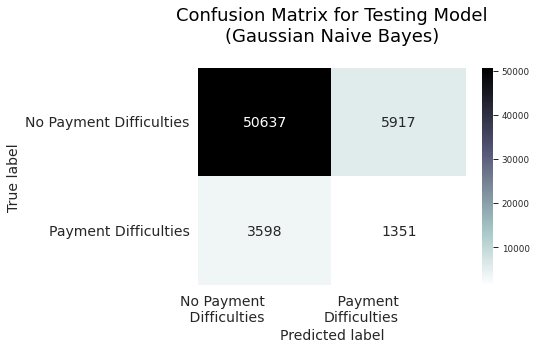

In [117]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\n Difficulties', ' Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [118]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 84.87
Test Accuracy: % 84.53


It can be seen that:

*    Gaussian naive bayes model gives 60.24% correct results.
*    There is 0.15% error margin.



In [119]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.5842


**3. Decision Tree**

In [120]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [121]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



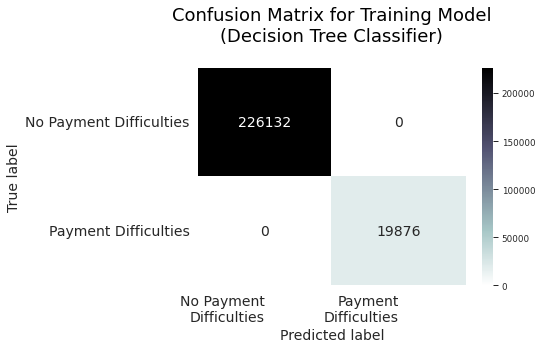

In [122]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\nDifficulties', 'Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [123]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56554
           1       0.14      0.16      0.15      4949

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.53     61503
weighted avg       0.86      0.85      0.86     61503



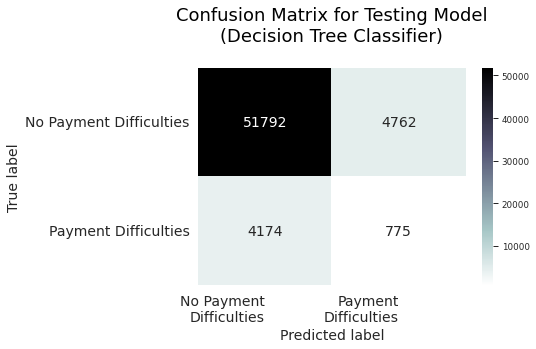

In [124]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\nDifficulties', 'Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [125]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 85.47


It can be seen that:

*    Decision tree model gives 100% correct results.
*    There is 11.74% error margin. This is not good for this data.

In [126]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.5362


**4. Random Forest**

In [127]:
# train the model
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
print(rf_model)

RandomForestClassifier(random_state=42)


In [128]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



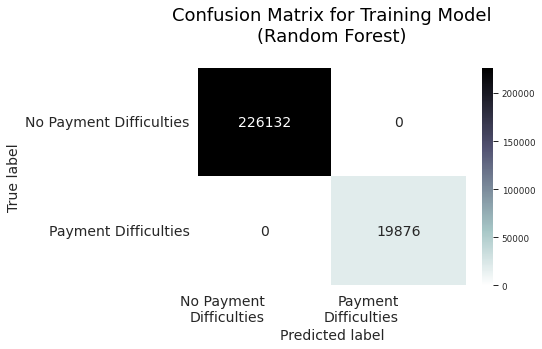

In [129]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\nDifficulties', 'Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [130]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.48      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.70      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



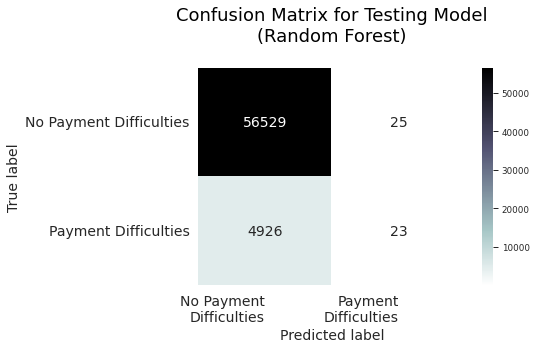

In [131]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment\nDifficulties', 'Payment\nDifficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [132]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 99.99
Test Accuracy: % 91.95




It can be seen that:

*    Random forest model gives 100% correct results.
*    There is 0.35% error margin.



In [133]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.5021


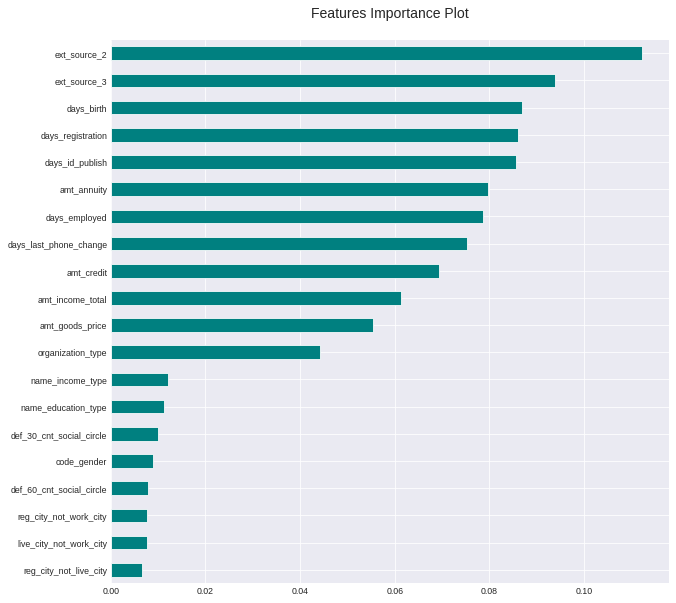

In [134]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

the plot above confirms that the 5 most important features are `ext_source_2`, `ext_source_3`, `days_birth`, `days_id_publish`, and `days_registration`

# **Model Selection**

In [135]:
results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],["Gaussian Naive Bayes", 0.6024, 0.6039, 0.604],
                       ["Decision Tree", 1, 0.8826, 0.8826],["Random Forest", 1, 0.9965, 0.9965]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"]).reset_index(drop=True)

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='BuGn')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.000000,0.996500,0.996500
2,Decision Tree,1.000000,0.882600,0.882600
0,Logistic Regression,0.671600,0.672900,0.672900
1,Gaussian Naive Bayes,0.602400,0.603900,0.604000


The prediction accuracy of the train and test data in **Random Forest** model has a value that is not much different, it can be said that the model is very good, which is there is no underfitting or overfitting. So the **Random Forest** model was chosen as the best model to predict client’s repayment abilities.

# **Prediction**

**Import Dataset**

In [136]:
#import dataset
df_test = pd.read_csv('/content/drive/MyDrive/Home Credit Final Task/application_test.csv')

#display dataset form
#display dataset form
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)

#display top 5 rows of the dataset
df_test.head()

This dataset has 48744 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [137]:
#rename column to lowercase
df_test.columns= df_test.columns.str.lower()
df_test.columns

Index(['sk_id_curr', 'name_contract_type', 'code_gender', 'flag_own_car',
       'flag_own_realty', 'cnt_children', 'amt_income_total', 'amt_credit',
       'amt_annuity', 'amt_goods_price',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=121)

In [138]:
df_test.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    sk_id_curr                    48744 non-null  int64  
 1    name_contract_type            48744 non-null  object 
 2    code_gender                   48744 non-null  object 
 3    flag_own_car                  48744 non-null  object 
 4    flag_own_realty               48744 non-null  object 
 5    cnt_children                  48744 non-null  int64  
 6    amt_income_total              48744 non-null  float64
 7    amt_credit                    48744 non-null  float64
 8    amt_annuity                   48720 non-null  float64
 9    amt_goods_price               48744 non-null  float64
 10   name_type_suite               47833 non-null  object 
 11   name_income_type              48744 non-null  object 
 12   name_education_type           48744 non-null

There are total 48,744 rows which contains the information of loans and there are 121 features (without target feature).

# **Data Preprocessing**

**Detecting Duplication**

In [139]:
print('The number of duplication is:', df_test.duplicated().sum())
# there is no duplication

The number of duplication is: 0


**Detecting Missing Value**

In [140]:
# check for empty elements
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,commonarea_avg,33495,68.716150
1,commonarea_mode,33495,68.716150
2,commonarea_medi,33495,68.716150
3,nonlivingapartments_avg,33347,68.412523
4,nonlivingapartments_mode,33347,68.412523
5,nonlivingapartments_medi,33347,68.412523
6,fondkapremont_mode,32797,67.284179
7,livingapartments_avg,32780,67.249302
8,livingapartments_mode,32780,67.249302
9,livingapartments_medi,32780,67.249302


In [141]:
#drop columns that have large number of missing values (more than 50%)
df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)
df_test.drop(['own_car_age','ext_source_1'], inplace=True, axis=1)

In [142]:
# check for empty elements after drop some features
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,occupation_type,15605,32.014197
1,ext_source_3,8668,17.782701
2,amt_req_credit_bureau_year,6049,12.409732
3,amt_req_credit_bureau_qrt,6049,12.409732
4,amt_req_credit_bureau_mon,6049,12.409732
5,amt_req_credit_bureau_week,6049,12.409732
6,amt_req_credit_bureau_day,6049,12.409732
7,amt_req_credit_bureau_hour,6049,12.409732
8,name_type_suite,911,1.868948
9,obs_30_cnt_social_circle,29,0.059495


In [143]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [144]:
# check for empty elements after imputation
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,sk_id_curr,0,0.0
1,name_contract_type,0,0.0
2,flag_document_8,0,0.0
3,flag_document_7,0,0.0
4,flag_document_6,0,0.0
5,flag_document_5,0,0.0
6,flag_document_4,0,0.0
7,flag_document_3,0,0.0
8,flag_document_2,0,0.0
9,days_last_phone_change,0,0.0


**Label Encoding**

In [145]:
# label encoder for object features
df_test[["code_gender", "name_contract_type", "flag_own_car", "flag_own_realty", 
          "name_type_suite", "name_income_type", "name_education_type", "name_family_status",
         "name_housing_type", "occupation_type", "weekday_appr_process_start", "organization_type"]] = df_test[["code_gender", "name_contract_type", "flag_own_car", "flag_own_realty", 
          "name_type_suite", "name_income_type", "name_education_type", "name_family_status",
         "name_housing_type", "occupation_type", "weekday_appr_process_start", "organization_type"]].apply(LabelEncoder().fit_transform)

In [146]:
df_test.head()

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# **Convert Negative Values to Positive Values**

the features that have negative values are `days_birth`, `days_employed`, `days_id_publish`, `days_registration`, and `days_last_phone_change`

In [147]:
df_test.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sk_id_curr                   48744 non-null  int64  
 1   name_contract_type           48744 non-null  int64  
 2   code_gender                  48744 non-null  int64  
 3   flag_own_car                 48744 non-null  int64  
 4   flag_own_realty              48744 non-null  int64  
 5   cnt_children                 48744 non-null  int64  
 6   amt_income_total             48744 non-null  float64
 7   amt_credit                   48744 non-null  float64
 8   amt_annuity                  48744 non-null  float64
 9   amt_goods_price              48744 non-null  float64
 10  name_type_suite              48744 non-null  int64  
 11  name_income_type             48744 non-null  int64  
 12  name_education_type          48744 non-null  int64  
 13  name_family_stat

In [148]:
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

# **Prediction**

Predict client's repayment abilities on application data test with best machine learning model obtained before, i.e **Random Forest**.

In [149]:
pred_test = df_test[['days_employed', 'amt_goods_price', 'amt_credit', 'days_birth', 'amt_income_total', 'days_registration', 'days_last_phone_change', 'days_id_publish', 'amt_annuity', 'organization_type', 'name_income_type', 'reg_city_not_work_city','code_gender', 'ext_source_2', 'reg_city_not_live_city', 'name_education_type','def_30_cnt_social_circle', 'ext_source_3', 'def_60_cnt_social_circle', 'live_city_not_work_city']]
pred_test.head()

,days_employed,amt_goods_price,amt_credit,days_birth,amt_income_total,days_registration,days_last_phone_change,days_id_publish,amt_annuity,organization_type,name_income_type,reg_city_not_work_city,code_gender,ext_source_2,reg_city_not_live_city,name_education_type,def_30_cnt_social_circle,ext_source_3,def_60_cnt_social_circle,live_city_not_work_city
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [150]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name = 'target').astype(int)
results = pd.concat([df_test['sk_id_curr'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

,sk_id_curr,target
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [151]:
results = results.groupby('target').agg(customer_cnt=('sk_id_curr','count')).reset_index()
print('Target Customer after predicted :')
results

Target Customer after predicted :


,target,customer_cnt
0,0,48641
1,1,103
